Optimal w0: 1.0189129484363915, Optimal w1: 2.952988488705917


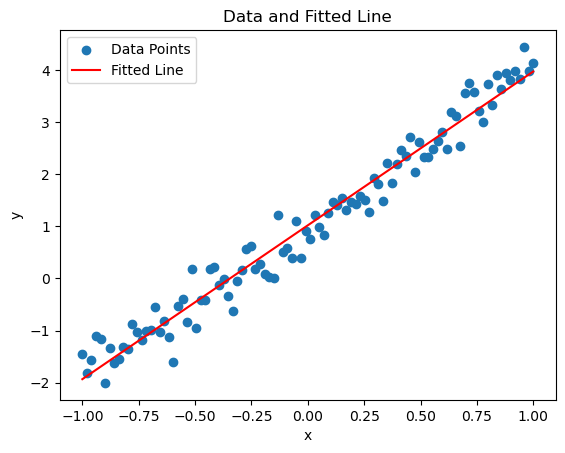

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate dataset
np.random.seed(0)  # For reproducibility
x = np.linspace(-1, 1, 100)  # 100 evenly spaced values from -1 to 1
epsilon = np.random.normal(0, np.sqrt(0.1), 100)  # Noise
y = 3*x + 1 + epsilon

# Define the error function
def error_function(w):
    w0, w1 = w
    return 0.5 * np.sum(((y - (x * w1 + w0)) / np.sqrt(0.1)) ** 2)

# Initial guess
w_initial = [0, 0]

# Minimize the error function
res = minimize(error_function, w_initial)

# Results
w0_opt, w1_opt = res.x
print(f"Optimal w0: {w0_opt}, Optimal w1: {w1_opt}")

# Plotting the error as a function of the number of updates is not directly possible
# without an iterative optimization process that records error at each step.
# Since we're using a direct optimization method (minimize), we don't have iterative updates.
# However, we can still plot the data and the fitted line.

plt.scatter(x, y, label='Data Points')
plt.plot(x, w1_opt * x + w0_opt, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Line')
plt.show()


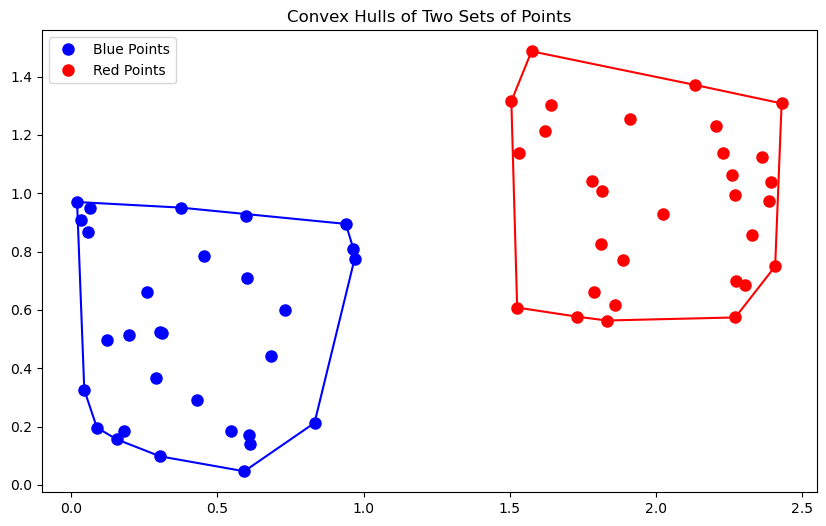

In [2]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# Generating random points for two sets
np.random.seed(42)  # For reproducibility
blue_points = np.random.rand(30, 2)  # 30 random points for blue set
red_points = np.random.rand(30, 2) + np.array([1.5, 0.5])  # 30 random points for red set, offset to the right

# Compute the convex hulls for each set of points
blue_hull = ConvexHull(blue_points)
red_hull = ConvexHull(red_points)

# Plotting
plt.figure(figsize=(10, 6))

# Plot blue points and its convex hull
plt.plot(blue_points[:, 0], blue_points[:, 1], 'o', markersize=8, color='blue', label='Blue Points')
for simplex in blue_hull.simplices:
    plt.plot(blue_points[simplex, 0], blue_points[simplex, 1], 'b-')  # Hull edges

# Plot red points and its convex hull
plt.plot(red_points[:, 0], red_points[:, 1], 'o', markersize=8, color='red', label='Red Points')
for simplex in red_hull.simplices:
    plt.plot(red_points[simplex, 0], red_points[simplex, 1], 'r-')  # Hull edges

plt.title('Convex Hulls of Two Sets of Points')
plt.legend()
plt.show()


In [3]:
from sympy import symbols, diff, solve

# Define symbols
w0, w1, x, y, sigma = symbols('w0 w1 x y sigma')

# Define the error function E
E = 1/2 * ((y - x*w1 - w0)/sigma)**2

# Take partial derivatives
dE_dw0 = diff(E, w0)
dE_dw1 = diff(E, w1)

# Solve the equations dE_dw0 = 0 and dE_dw1 = 0 for w0 and w1
# Note: To actually solve the system, we need the sums over all n. We're setting up the equations here
# to illustrate the process. Actual numerical solution would require data.

dE_dw0, dE_dw1


(0.5*(2*w0 + 2*w1*x - 2*y)/sigma**2, -1.0*x*(-w0 - w1*x + y)/sigma**2)

C:\ProgramData\anaconda_3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Olajide\AppData\Local\Temp\ipykernel_12604\2618477341.py:21: RuntimeWarning: overflow encountered in square
  return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)
C:\Users\Olajide\AppData\Local\Temp\ipykernel_12604\2618477341.py:30: RuntimeWarning: overflow encountered in scalar divide
  grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
C:\ProgramData\anaconda_3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Olajide\AppData\Local\Temp\ipykernel_12604\2618477341.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  w0 -= learning_rate * grad_w0


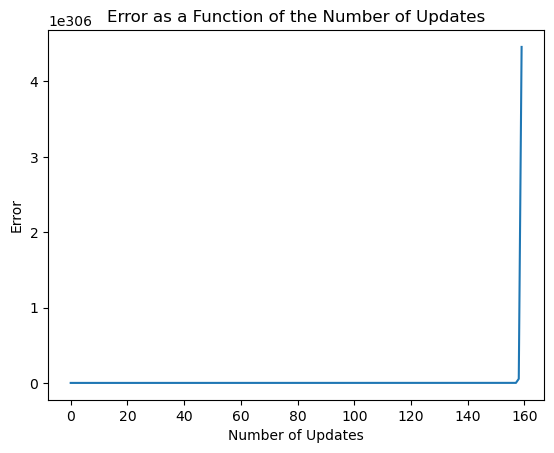

(nan, nan)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
np.random.seed(0)  # For reproducibility
N = 100  # Number of elements
sigma = np.sqrt(0.1)  # Standard deviation

# Generating dataset
x_n = np.random.uniform(-1, 1, N)  # Uniformly distributed x values between -1 and 1
epsilon_n = np.random.normal(0, sigma, N)  # Noise epsilon
y_n = 3*x_n + 1 + epsilon_n  # y values according to the given formula

# Initializing parameters
w0 = 0  # Initial guess for w0
w1 = 0  # Initial guess for w1
learning_rate = 0.01  # Learning rate for updates

# Error function
def compute_error(w0, w1, x_n, y_n, sigma):
    return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)

# Gradient descent to update w0 and w1
error_history = []  # To track error over updates
for update in range(1000):  # Number of updates
    error = compute_error(w0, w1, x_n, y_n, sigma)
    error_history.append(error)

    # Gradients
    grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
    grad_w1 = np.sum(x_n * (w0 + w1*x_n - y_n)) / (sigma**2)

    # Update rules
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

# Plotting the error as a function of the number of updates
plt.plot(error_history)
plt.xlabel('Number of Updates')
plt.ylabel('Error')
plt.title('Error as a Function of the Number of Updates')
plt.show()

w0, w1


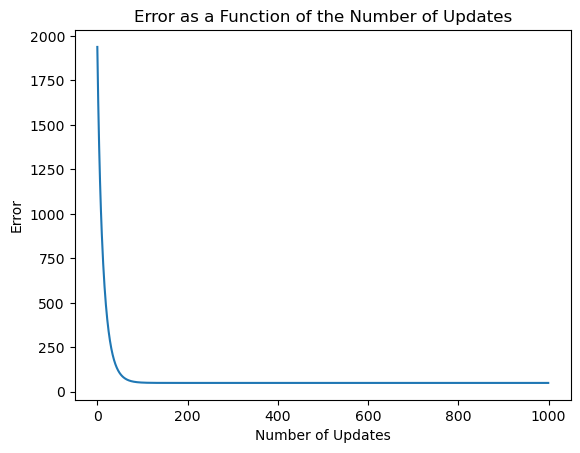

(1.0602788902914029, 2.990028551352027)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
np.random.seed(0)  # For reproducibility
N = 100  # Number of elements
sigma = np.sqrt(0.1)  # Standard deviation

# Generating dataset
x_n = np.random.uniform(-1, 1, N)  # Uniformly distributed x values between -1 and 1
epsilon_n = np.random.normal(0, sigma, N)  # Noise epsilon
y_n = 3*x_n + 1 + epsilon_n  # y values according to the given formula

# Initializing parameters
w0 = 0  # Initial guess for w0
w1 = 0  # Initial guess for w1
learning_rate = 0.0001  # Learning rate for updates

# Error function
def compute_error(w0, w1, x_n, y_n, sigma):
    return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)

# Gradient descent to update w0 and w1
error_history = []  # To track error over updates
for update in range(1000):  # Number of updates
    error = compute_error(w0, w1, x_n, y_n, sigma)
    error_history.append(error)

    # Gradients
    grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
    grad_w1 = np.sum(x_n * (w0 + w1*x_n - y_n)) / (sigma**2)

    # Update rules
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

# Plotting the error as a function of the number of updates
plt.plot(error_history)
plt.xlabel('Number of Updates')
plt.ylabel('Error')
plt.title('Error as a Function of the Number of Updates')
plt.show()

w0, w1


Using GMM to model Cloud.dat

In [6]:
#class RBFNet(nn.Module):
#    def __init__(self, centers, sigma):
#        super(RBFNet, self).__init__()
#        self.centers = nn.Parameter(centers)
#        self.sigmas = nn.Parameter(sigma)
#        self.linear = nn.Linear(centers.size(0), 1)  # Assuming binary classification

#    def forward(self, x):
        # Calculate the RBF activations for each neuron
#        diff = x[:, None, :] - self.centers[None, :, :]
#        dist_sq = torch.sum(diff ** 2, axis=-1)
#        out = torch.exp(-dist_sq / (2 * self.sigmas ** 2))
        # Linear combination for the output layer#
#        out = self.linear(out)
#        return out

# Define your RBF centers and sigmas
# centers = ...
# sigma = ...
# Initialize the RBF network
# rbfnet = RBFNet(centers, sigma)
# Train the RBF network
# ...


# Using Custom Parametric Model

In [7]:
# First, let's load the data from 'cloud.dat' and inspect its contents.
import numpy as np

# Load the dataset
#data_path = 'cloud.dat'
data_path = 'https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/cloud.dat'
data = np.loadtxt(data_path)

# Now let's define the conversion from Cartesian to polar coordinates.
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

# Convert the data to polar coordinates
r, theta = cartesian_to_polar(data[:, 0], data[:, 1])

# Analyze the distribution of the radius
mean_r = np.mean(r)
std_r = np.std(r)

# For this dataset, we can assume that the angle 'theta' is uniformly distributed around the circle,
# so we don't need to estimate any parameters for 'theta'.

# Define a model for the radius
def radius_density(r, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((r - mean)**2) / (2 * std**2))

# Estimate the probability density of the radius
radius_pdf = radius_density(r, mean_r, std_r)

# Display the mean and standard deviation of the radius
mean_r, std_r, radius_pdf[:5]  # Displaying only the first 5 values of the density for brevity



(1.267660186267401,
 0.6107883776853938,
 array([0.10226725, 0.65012728, 0.11561314, 0.43183632, 0.46924191]))

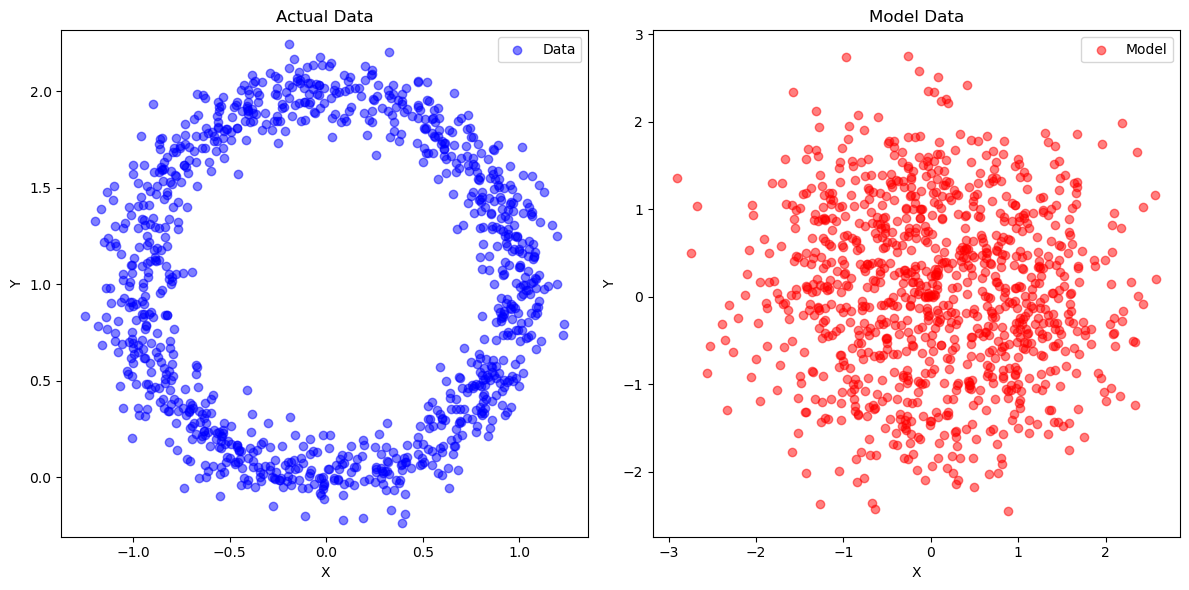

In [8]:
import matplotlib.pyplot as plt

# Plotting the actual data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data')
plt.axis('equal')
plt.legend()

# Generating model data
num_points = len(data)
theta_model = np.random.uniform(0, 2*np.pi, num_points)
r_model = np.random.normal(mean_r, std_r, num_points)
x_model = r_model * np.cos(theta_model)
y_model = r_model * np.sin(theta_model)

plt.subplot(1, 2, 2)
plt.scatter(x_model, y_model, color='red', alpha=0.5, label='Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Data')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


# Using Radial Basis Function (RBF)

C:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


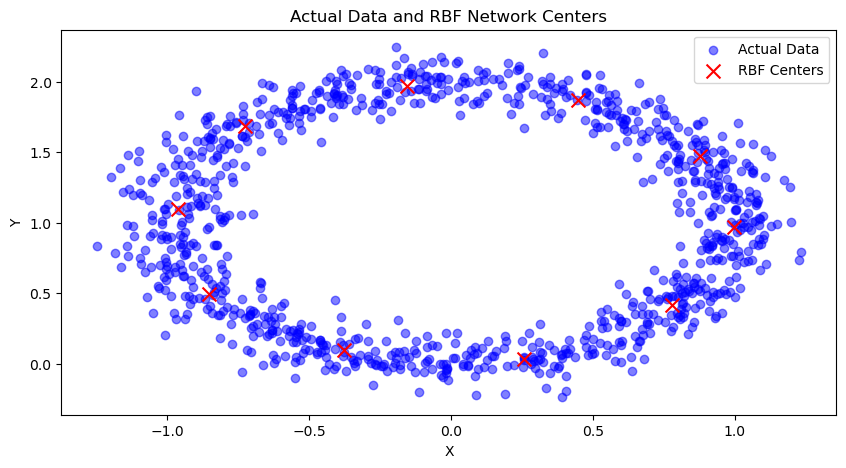

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.interpolate import RBFInterpolator
import numpy as np

# Load the dataset again
#data_path = 'cloud.dat'
data_path = 'https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/cloud.dat'
data = np.loadtxt(data_path)

# Prepare the data
X = data[:, :2]  # Input features (x, y coordinates)
y = np.zeros((len(data),))  # Dummy variable, since we're not doing prediction but fitting

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use KMeans to find centers for the RBFs
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_train)

# Define and train RBF Network
rbf_interpolator = RBFInterpolator(kmeans.cluster_centers_, y_train[:kmeans.n_clusters], kernel='gaussian', epsilon=1)

# Generate model data (we'll use the test set for this purpose)
y_model = rbf_interpolator(X_test)

# Since y is a dummy variable, we're interested in the fitting itself, not the prediction. Thus, we visualize the centers.
centers = kmeans.cluster_centers_

# Plotting the actual data and the RBF centers
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Actual Data')

# RBF Centers
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label='RBF Centers')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and RBF Network Centers')
plt.legend()
plt.show()


# Using Gaussian Mixture Model

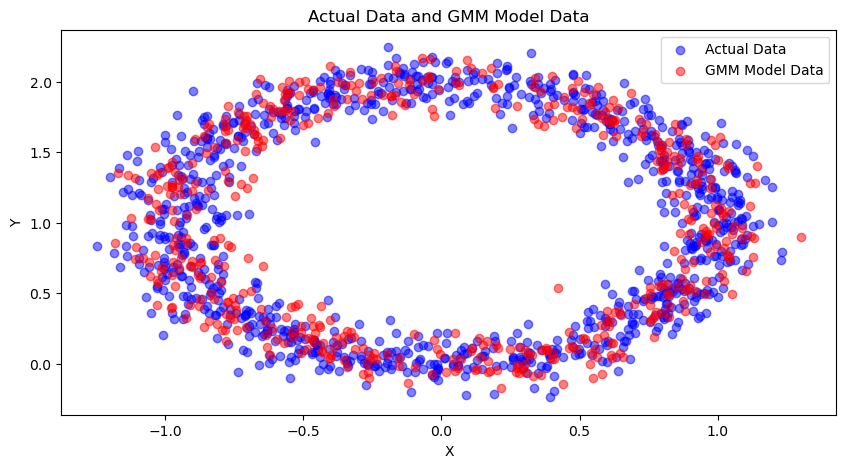

In [10]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model with 10 components to the data
gmm = GaussianMixture(n_components=10, random_state=42).fit(X)

# Predict the labels of the data points
labels = gmm.predict(X)

# Generate model data
# We'll sample 500 points from the GMM to serve as our model data
X_model, _ = gmm.sample(500)

# Plotting the actual data and the model data generated by the GMM
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# Model data from GMM
plt.scatter(X_model[:, 0], X_model[:, 1], color='red', alpha=0.5, label='GMM Model Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and GMM Model Data')
plt.legend()
plt.show()


# Using Circular Regression Model

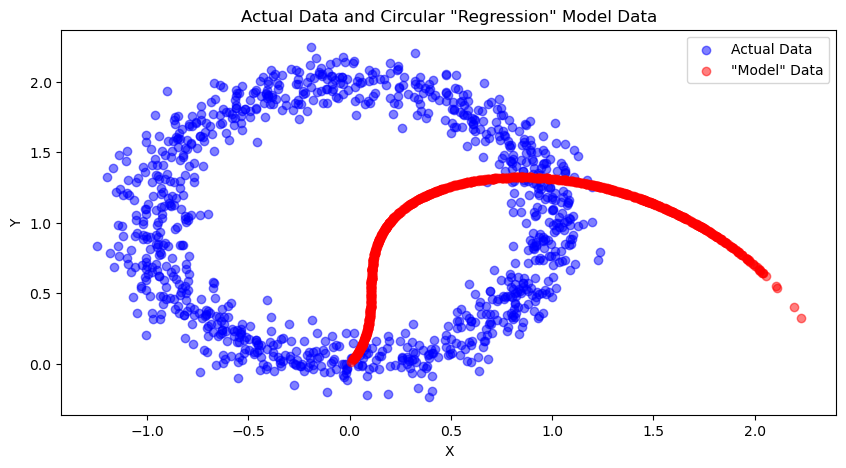

In [11]:
# Calculate polar coordinates from the Cartesian coordinates of the actual data
r_data, theta_data = cartesian_to_polar(X[:, 0], X[:, 1])

# Illustrative model: Predict theta as a function of r (for visualization purposes)
# This is a simplistic and illustrative model, not a true circular regression
theta_model = np.sin(r_data) + np.cos(r_data)

# Convert the model theta back to Cartesian coordinates for visualization
x_model = r_data * np.cos(theta_model)
y_model = r_data * np.sin(theta_model)

# Plotting the actual data and the "model" data
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# "Model" data
plt.scatter(x_model, y_model, color='red', alpha=0.5, label='"Model" Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and Circular "Regression" Model Data')
plt.legend()
plt.show()


# Using Spectral Clustering

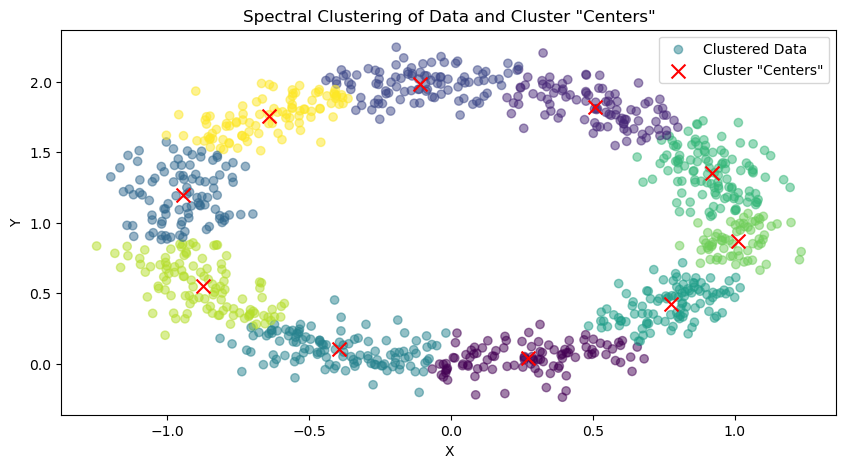

In [12]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering on the data
# We choose 10 clusters to match the previous models for consistency
spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X)

# For visualization purposes, we'll use the cluster centers as a "model" of the data.
# Calculate the pseudo "centers" of the clusters
centers = np.array([X[labels == i].mean(axis=0) for i in range(10)])

# Plotting the actual data and the "centers" of the spectral clusters
plt.figure(figsize=(10, 5))

# Actual data with cluster coloring
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Clustered Data')

# Cluster "centers" determined by mean position
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label='Cluster "Centers"')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spectral Clustering of Data and Cluster "Centers"')
plt.legend()
plt.show()


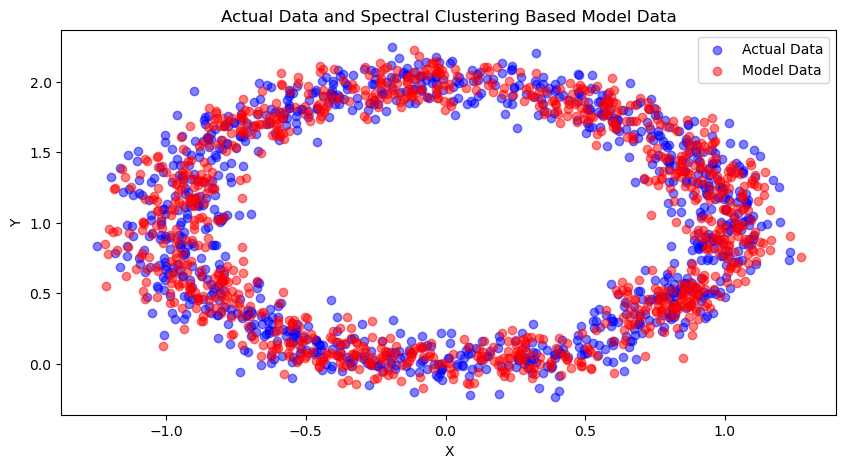

In [13]:
from sklearn.covariance import EmpiricalCovariance
import numpy as np

# Initialize a list to hold the generated model data
model_data = np.empty((0, 2))

# For each cluster, estimate a Gaussian distribution and sample new data points
for i in range(10):
    cluster_points = X[labels == i]
    if len(cluster_points) == 0:
        continue  # Skip empty clusters, if any

    # Estimate the covariance of the current cluster
    cov_estimator = EmpiricalCovariance().fit(cluster_points)
    cov_matrix = cov_estimator.covariance_

    # Generate new points from a multivariate normal distribution based on the cluster's properties
    new_points = np.random.multivariate_normal(mean=centers[i], cov=cov_matrix, size=len(cluster_points))

    # Append the new points to the model data
    model_data = np.vstack((model_data, new_points))

# Plotting the actual data and the generated model data
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# Model data generated based on spectral clustering
plt.scatter(model_data[:, 0], model_data[:, 1], color='red', alpha=0.5, label='Model Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and Spectral Clustering Based Model Data')
plt.legend()
plt.show()


# Deep Learning with a Custom Loss Function

In [14]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [15]:
def custom_loss(y_true, y_pred):
    reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    regularization_term = tf.reduce_mean(tf.square(tf.norm(encoded, axis=1) - 1))
    return reconstruction_loss + 0.01 * regularization_term


In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [17]:
input_layer = Input(shape=(2,))  # Assuming 2D input data
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(2, activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)


In [18]:
def custom_loss(y_true, y_pred):
    reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    regularization_term = tf.reduce_mean(tf.square(tf.norm(encoded, axis=1) - 1))
    return reconstruction_loss + 0.01 * regularization_term


In [19]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=custom_loss)


In [20]:
#history = autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, validation_split=0.2)


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model

class CustomEncodingLayer(Layer):
    def __init__(self, encoding_dim):
        super(CustomEncodingLayer, self).__init__()
        self.encoding_dim = encoding_dim
        self.dense = Dense(encoding_dim, activation='relu')

    def call(self, inputs):
        encoded = self.dense(inputs)
        # Compute regularization term directly here if needed
        return encoded

class CustomAutoencoder(Model):
    def __init__(self, encoding_dim, input_dim):
        super(CustomAutoencoder, self).__init__()
        self.encoder = CustomEncodingLayer(encoding_dim)
        self.decoder = Dense(input_dim, activation='linear')

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

    def train_step(self, data):
        # Override train_step to compute and apply custom loss
        # Make sure to compute the regularization term correctly within the TensorFlow graph
        pass  # Implement training logic here


In [22]:
import numpy as np

def cart_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def polar_to_cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Assuming 'data' is a NumPy array with x, y coordinates
r, theta = cart_to_polar(data[:, 0], data[:, 1])

# Estimate parameters for the radius distribution
mean_r = np.mean(r)
std_r = np.std(r)

# For theta, if it is uniformly distributed, we do not need to estimate any parameters

# Define the likelihood function
def likelihood(r, theta, mean_r, std_r):
    prob_r = np.exp(-(r - mean_r)**2 / (2 * std_r**2)) / (std_r * np.sqrt(2 * np.pi))
    prob_theta = 1 / (2 * np.pi)  # For uniform distribution
    return prob_r * prob_theta

# Parameter estimation could be performed here using an optimization method if necessary

# Predicting new data points
def predict(num_samples, mean_r, std_r):
    r = np.random.normal(mean_r, std_r, num_samples)
    theta = np.random.uniform(0, 2*np.pi, num_samples)
    x, y = polar_to_cart(r, theta)
    return x, y

# Generate new data points
num_samples = 100
predicted_x, predicted_y = predict(num_samples, mean_r, std_r)



# Using Support Vector Machine (SVM) with RBF Kernel to Model the Data

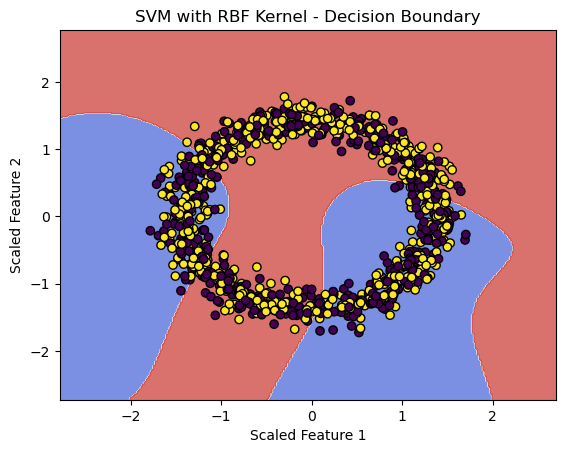

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np

# Assuming we're working with the same X data loaded previously

# Step 1: Preprocessing - Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: For demonstration, let's use the make_moons function to generate a binary classification dataset
# This is purely for demonstration; replace this with your actual labels if you have a labeled dataset
_, y_demo = make_moons(n_samples=len(X), noise=0.1, random_state=42)

# Step 3: Model Training - Train an SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_scaled, y_demo)

# Step 4: Visualization - We'll visualize the decision boundary along with the data
# Create a mesh to plot the decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the mesh grid to find the decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_demo, edgecolors='k')
plt.title('SVM with RBF Kernel - Decision Boundary')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()


# Using Physicsbased or Geometrical Modeling

Optimized Circle Parameters: Center = (-0.0015044681288011357, 1.000088021498813), Radius = 1.0047406173649176


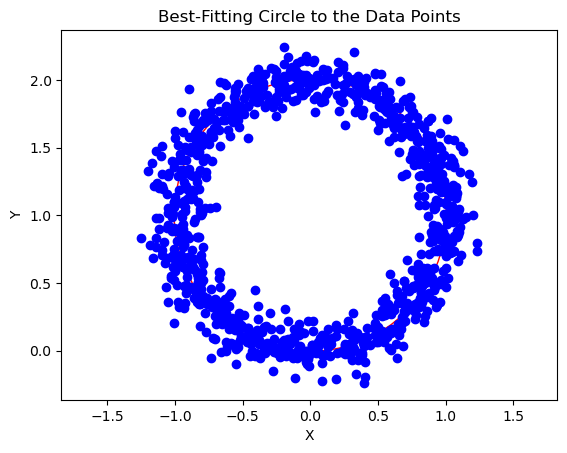

In [24]:
from scipy import optimize

# Define the objective function for the best-fitting circle
def objective_function(circle, x):
    x_c, y_c, r = circle
    return ((x[:, 0] - x_c)**2 + (x[:, 1] - y_c)**2 - r**2)**2

# Initial guess for the circle's center and radius
initial_guess = [0.0, 0.0, 1.0]

# Perform the optimization to find the best-fitting circle
result = optimize.minimize(
    lambda circle: sum(objective_function(circle, X)),
    initial_guess,
    method='L-BFGS-B',  # Bounded optimization method suitable for this problem
    bounds=[(-np.inf, np.inf), (-np.inf, np.inf), (0, np.inf)]  # Radius must be non-negative
)

if result.success:
    fitted_circle = result.x
    print(f"Optimized Circle Parameters: Center = ({fitted_circle[0]}, {fitted_circle[1]}), Radius = {fitted_circle[2]}")
else:
    print("Optimization was not successful. Please check the data or initial guess.")

# Visualization of the fitted circle and the data points
circle = plt.Circle((fitted_circle[0], fitted_circle[1]), fitted_circle[2], color='r', fill=False)

fig, ax = plt.subplots()
ax.add_artist(circle)
ax.scatter(X[:, 0], X[:, 1], color='blue')
ax.set_aspect('equal', adjustable='datalim')
plt.title('Best-Fitting Circle to the Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# DBSCAN

Number of clusters found: 1
Number of points classified as noise: 0


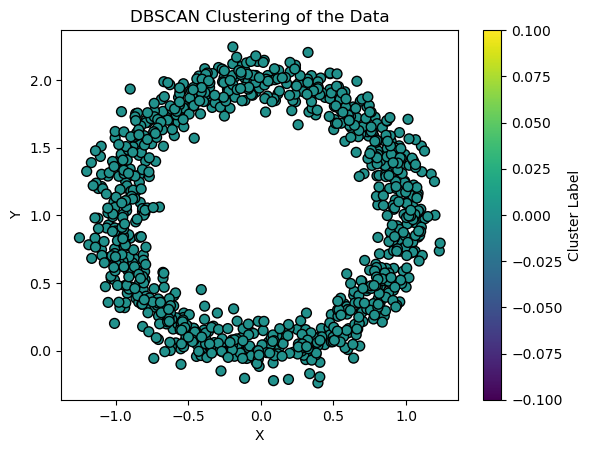

In [25]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Number of clusters found (excluding noise if present)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of points classified as noise: {n_noise}")

# Visualization of the clustering
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of the Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf


np.random.seed(0)  # For reproducibility
sigma_sq = 0.01  # Define the variance of the Gaussian noise
X = np.random.uniform(0, 1, 100)
Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Generate dataset
#np.random.seed(0)  # For reproducibility
#X = np.random.uniform(0, 1, 100)
#Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Sort X and compute centers for RBF
X_sorted = np.sort(X)
centers = np.array([np.mean(X_sorted[i:i+10]) for i in range(0, 100, 10)])

# Create RBF interpolator
#rbf_interpolator = Rbf(X, Y, centers, function='gaussian')

# Generate interpolating values
#X_interp = np.linspace(0, 1, 100)
#Y_interp = rbf_interpolator(X_interp)

# Plot the dataset and interpolating function
#plt.scatter(X, Y, label='Data Points')
#plt.plot(X_interp, Y_interp, color='red', label='Interpolating Function')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()

#plt.show()


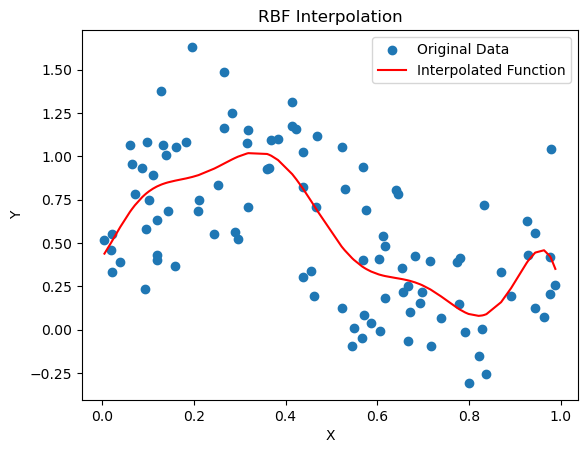

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

np.random.seed(0)  # For reproducibility
sigma_sq = 0.1  # Define the variance of the noise
X = np.random.uniform(0, 1, 100)
Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Sort X and find the centers
X_sorted = np.sort(X)
X_subsets = np.array_split(X_sorted, 10)
centers = np.array([np.mean(x_subset) for x_subset in X_subsets])

# Make sure the centers are broadcasted to each data point in X for interpolation#


# Assuming that 'centers' should be used to compute the values of RBF at data points
rbf_values = np.zeros((len(X), len(centers)))
for i, center in enumerate(centers):
    rbf_values[:, i] = np.exp(-((X - center) ** 2) / (2 * sigma_sq))

# Compute the weights for the RBF network
weights = np.linalg.lstsq(rbf_values, Y, rcond=None)[0]

# Generate interpolating values
Y_interpolated = rbf_values @ weights

# Plotting the original data and the interpolating function
plt.scatter(X, Y, label='Original Data')
plt.plot(X_sorted, Y_interpolated[np.argsort(X)], label='Interpolated Function', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('RBF Interpolation')
plt.show()


In [28]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def linear(x):
    return x

def linear_derivative(x):
    return 1

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = linear(self.z2)
        return self.a2

    def compute_loss(self, predicted, target):
        return np.mean((predicted - target) ** 2)


In [29]:
    def backward(self, x, y):
        m = y.shape[0]  # Number of examples
        dz2 = (self.a2 - y) / m
        dw2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0)

        dz1 = np.dot(dz2, self.w2.T) * tanh_derivative(self.z1)
        dw1 = np.dot(x.T, dz1)
        db1 = np.sum(dz1, axis=0)

        return dw1, db1, dw2, db2


In [30]:
def approximate_derivative(network, x, y, epsilon=1e-4):
    approx_derivatives = []
    # Approximate derivatives for weights and biases in layer 1
    for i in range(network.w1.size):
        w1_plus_eps = network.w1.copy()
        w1_plus_eps.flat[i] += epsilon
        loss_plus = network.compute_loss(network.forward(x), y)

        w1_minus_eps = network.w1.copy()
        w1_minus_eps.flat[i] -= epsilon
        loss_minus = network.compute_loss(network.forward(x), y)

        approx_derivative = (loss_plus - loss_minus) / (2 * epsilon)
        approx_derivatives.append(approx_derivative)

    # Similarly, add code for w2, b1, and b2 by following the same structure

    return approx_derivatives


In [31]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # Backward propagation
        error = self.forward(X) - y
        delta2 = error
        dw2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, self.w2.T) * (1 - np.tanh(self.z1) ** 2)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        return dw1, db1, dw2, db2

    def loss(self, y_pred, y_true):
        # Mean squared error loss
        return np.mean((y_pred - y_true) ** 2)

# Generate a dataset
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = np.random.randn(100, 1)  # 100 target values

# Initialize network
input_size = X.shape[1]
hidden_size = 5  # Number of hidden units
output_size = y.shape[1]
network = TwoLayerNetwork(input_size, hidden_size, output_size)

# Forward pass to compute initial loss
y_pred = network.forward(X)
initial_loss = network.loss(y_pred, y)

# Backward pass to compute gradients
dw1, db1, dw2, db2 = network.backward(X, y)

# Numerical gradient check
epsilon = 1e-5
network.w1 += epsilon
loss_plus_epsilon = network.loss(network.forward(X), y)
network.w1 -= 2 * epsilon
loss_minus_epsilon = network.loss(network.forward(X), y)
numerical_gradient_w1 = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)
print("Analytical Gradient:", np.linalg.norm(dw1))
print("Numerical Gradient:", np.linalg.norm(numerical_gradient_w1))

# Reset the weight after the check
network.w1 += epsilon

# Implement training loop, optimizer, etc., as needed.


Analytical Gradient: 70.00823583984142
Numerical Gradient: 1.6261183769517016


In [32]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # Forward pass
        y_pred = self.forward(X)
        # Backward pass
        grad_y_pred = 2.0 * (y_pred - y)
        grad_w2 = np.dot(self.a1.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0)

        grad_a1 = np.dot(grad_y_pred, self.w2.T)
        grad_z1 = grad_a1 * (1 - self.a1 ** 2)
        grad_w1 = np.dot(X.T, grad_z1)
        grad_b1 = np.sum(grad_z1, axis=0)

        return grad_w1, grad_b1, grad_w2, grad_b2


In [33]:
np.random.seed(0)
X = np.random.randn(100, 3)  # 100 samples, 3 features
y = np.random.randn(100, 1)  # 100 target values


In [34]:
input_size = 3
hidden_size = 5
output_size = 1
network = TwoLayerNetwork(input_size, hidden_size, output_size)

# Compute back-propagation derivatives
dw1, db1, dw2, db2 = network.backward(X, y)

def compute_numerical_gradient(N, X, y, epsilon=1e-5):
    initial_w1 = np.copy(N.w1)
    grad_approx = np.zeros_like(N.w1)

    # Compute numerical gradient for w1
    for i in range(N.w1.shape[0]):
        for j in range(N.w1.shape[1]):
            N.w1 = np.copy(initial_w1)
            N.w1[i, j] += epsilon
            y_pred_plus = N.forward(X)

            N.w1 = np.copy(initial_w1)
            N.w1[i, j] -= epsilon
            y_pred_minus = N.forward(X)

            grad_approx[i, j] = (np.sum((y_pred_plus - y) ** 2) - np.sum((y_pred_minus - y) ** 2)) / (2 * epsilon)

    N.w1 = initial_w1  # Reset to original weights
    return grad_approx

# Compute numerical gradient
numerical_grad_w1 = compute_numerical_gradient(network, X, y)

# Compare gradients
print("Analytical Gradient:", np.linalg.norm(dw1))
print("Numerical Gradient:", np.linalg.norm(numerical_grad_w1))


Analytical Gradient: 210.83703175027478
Numerical Gradient: 210.83703175659807


In [35]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # (Implement backward pass here)
        pass

    def compute_loss(self, y_pred, y_true):
        # Mean squared error
        return np.mean((y_pred - y_true) ** 2)

# (Continue with the rest of your implementation)


In [36]:
# Initialize the network with the proper dimensions
network = TwoLayerNetwork(input_size=3, hidden_size=5, output_size=1)

# Generate synthetic data for testing
np.random.seed(42)
X_test = np.random.randn(10, 3)
y_test = np.random.randn(10, 1)

# Forward pass to get predictions
predictions = network.forward(X_test)

# Compute loss between predictions and actual values
loss = network.compute_loss(predictions, y_test)
print(f"Loss: {loss}")

# Add the backward pass and numerical gradient checking as needed


Loss: 1.599638964458304


In [37]:
#class TwoLayerNetwork:
 #   def __init__(self, input_size, hidden_size, output_size):
        # Initialization code as before

  #  def forward(self, X):
        # Forward pass code as before

   # def backward(self, X, y):
        # Backward pass code as before

    #def compute_loss(self, y_pred, y_true):
        # Mean Squared Error Loss
     #   return np.mean((y_pred - y_true) ** 2)


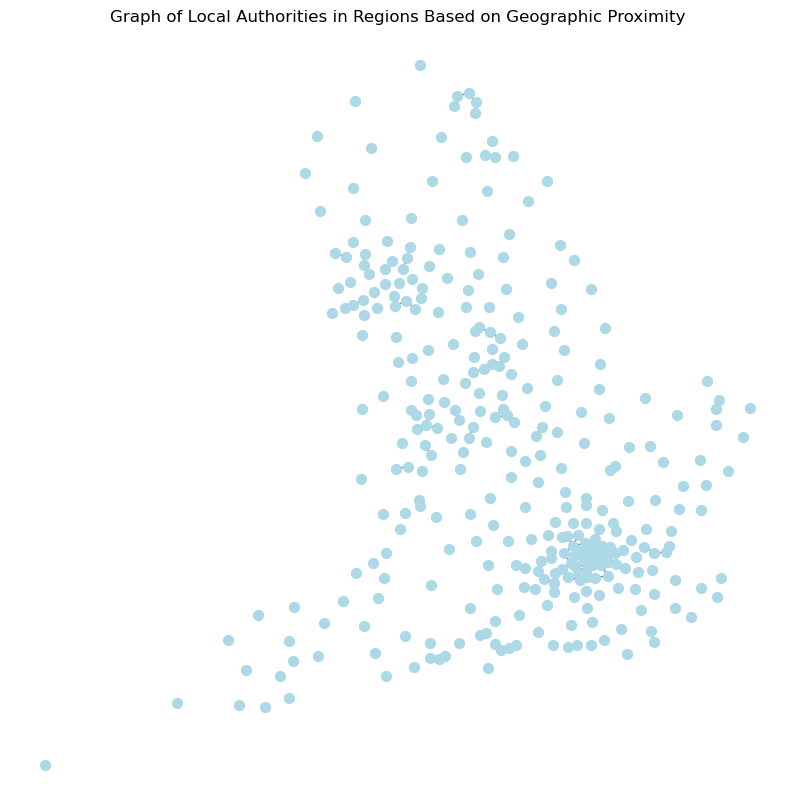

In [38]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd

# Load the datasets
topo_lad_df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv')
all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')

# Merge on the 'Local Authority' column to align the datasets
filtered_gdf_ = all_regions_data_.merge(topo_lad_df, left_on='Local Authority', right_on='LAD13NM')

import geopandas as gpd
from shapely import wkt

# Convert 'geometry' column from WKT to shapely geometries
topo_lad_df['geometry'] = topo_lad_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(topo_lad_df, geometry='geometry')

# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

# Extract latitude and longitude from the centroids
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Compute differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

def find_neighbors(gdf, threshold=10):  # Threshold in kilometers
    edges = []
    for index, row in gdf.iterrows():
        lat1, lon1 = row['latitude'], row['longitude']
        for j, candidate_row in gdf.iterrows():
            if index == j:
                continue  # Skip self
            lat2, lon2 = candidate_row['latitude'], candidate_row['longitude']
            distance = haversine(lat1, lon1, lat2, lon2)
            if distance <= threshold:
                edges.append((index, j))
    return edges


edges = find_neighbors(gdf, threshold=10)

import networkx as nx

# Initialize an empty graph
G = nx.Graph()

G.add_edges_from(edges)

for index, row in gdf.iterrows():
    G.add_node(index, label=row['LAD13NM'])

import matplotlib.pyplot as plt

# Define positions based on geographic coordinates
pos = {index: (row['longitude'], row['latitude']) for index, row in gdf.iterrows()}

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 10))
#nx.draw(G, pos, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
nx.draw(G, pos, ax=ax, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on Geographic Proximity')
plt.show()







In [39]:
all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')
all_regions_data_.to_csv('data_all.csv')

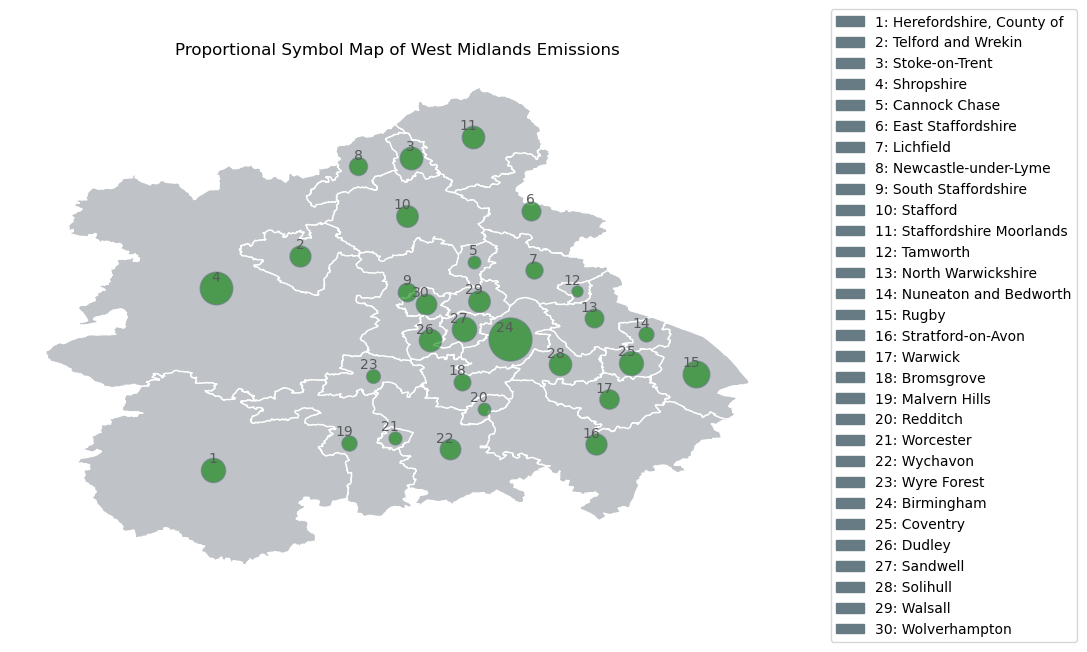

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        96194.42, 14592.43, 8323.91, 29913.27, 26291.81,
        18530.12, 30369.14, 15314.26, 12044.33,
        16825.96, 18244.97, 11604.42, 8275.61,
        37092.39, 31099.31, 55209.7, 26119.39, 17940.00,
        24410.05, 26321.27, 26681.51, 23179.05,
        6411.41, 22889.89, 24428.08, 19614.43, 22070.84,
        8733.09, 22128.51, 9923.38
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 100, edgecolor='#677B84', color='green', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


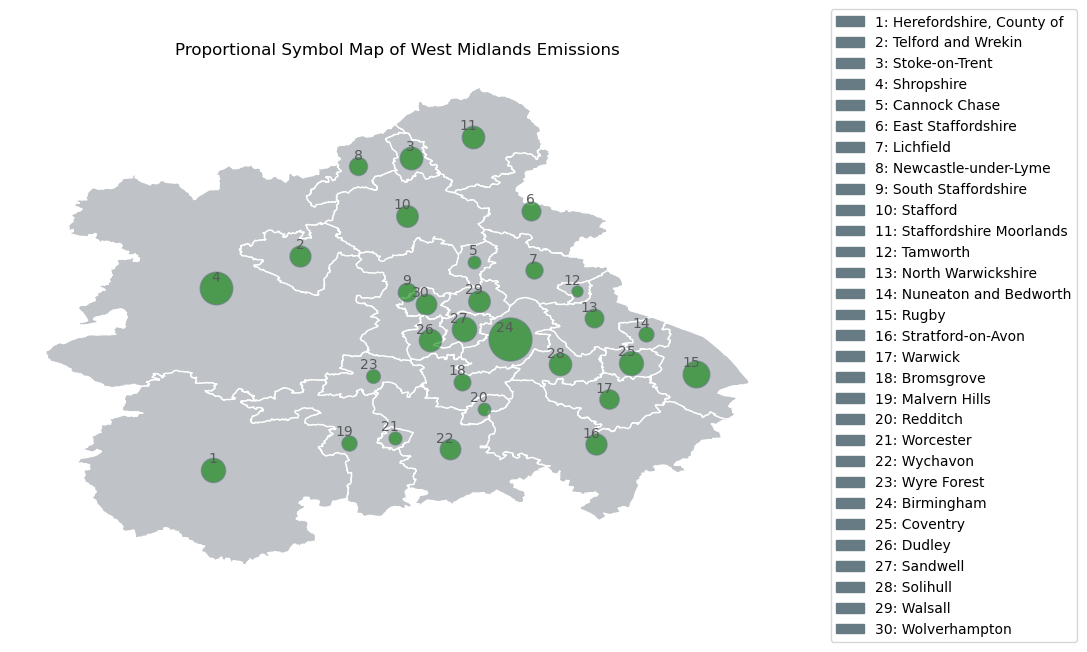

In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        96194.42, 14592.43, 8323.91, 29913.27, 26291.81,
        18530.12, 30369.14, 15314.26, 12044.33,
        16825.96, 18244.97, 11604.42, 8275.61,
        37092.39, 31099.31, 55209.7, 26119.39, 17940.00,
        24410.05, 26321.27, 26681.51, 23179.05,
        6411.41, 22889.89, 24428.08, 19614.43, 22070.84,
        8733.09, 22128.51, 9923.38
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 100, edgecolor='#677B84', color='green', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


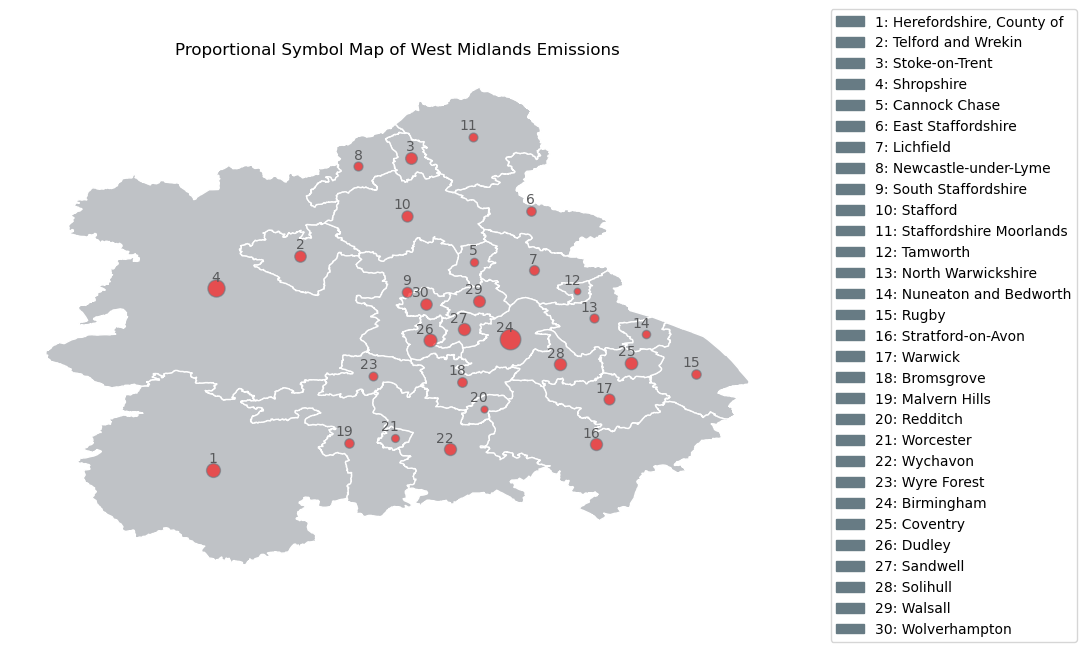

In [42]:
# comaparing value of emissions in 2008 and 2021 within the West Midlands
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        22.24302938, 4.833818788, 3.573942347, 8.082658044, 8.716090557,
        4.65914505, 10.03008724, 5.058948897, 4.592740429,
        4.205247479, 4.246878523, 3.589356627, 2.550547152,
        4.562981508, 7.726843804, 15.29768205, 7.742818656, 5.539861496,
        6.425263586, 4.022515094, 7.089696852, 7.535507473,
        2.259172515, 6.762043361, 7.251229458, 6.182550494, 6.799014853,
        3.242063331, 7.54829273, 4.023811033
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] * 10, edgecolor='#677B84', color='red', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()



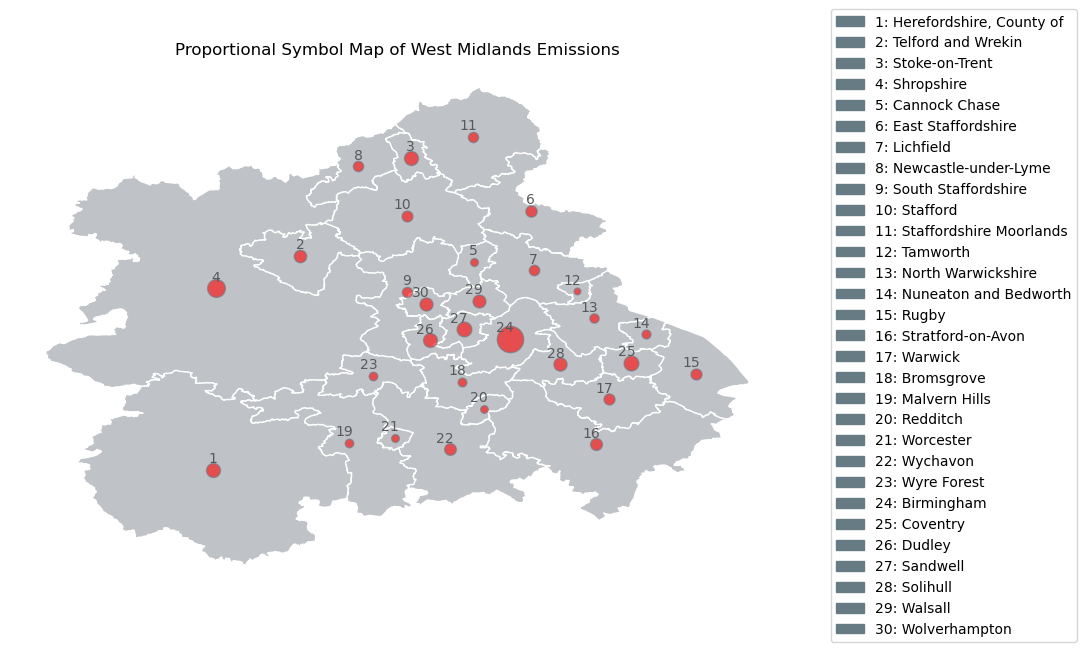

In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 10, edgecolor='#677B84', color='red', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


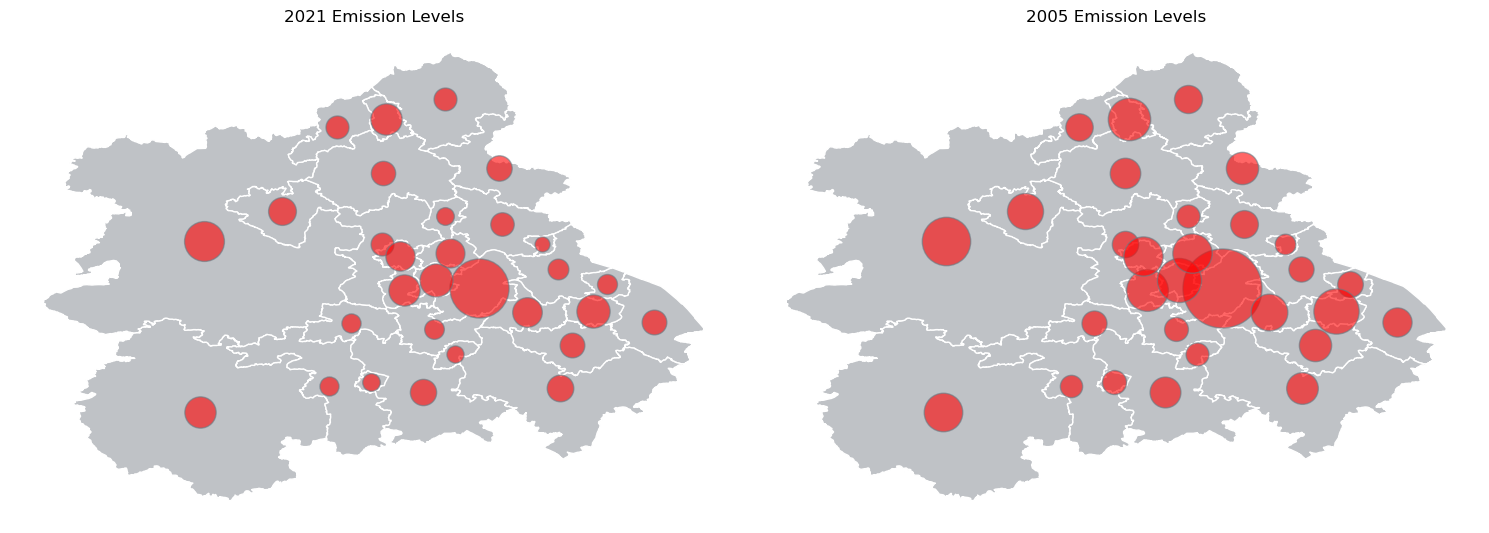

In [44]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first visualization
areas_to_visualize_1 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

# Data for the second visualization
areas_to_visualize_2 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        6479.843254, 590.7181488, 553.0509167, 2126.445049, 1804.133429,
        1078.711366, 1540.103887, 800.7480549, 517.1105821,
        781.5119445, 658.2316275, 681.6360141, 544.7472592,
        884.3129309, 2016.055588, 2429.660141, 1397.038485, 720.6282332,
        966.2980986, 815.9472484, 1867.227433, 1039.667955,
        440.4468112, 1351.832403, 1608.017111, 1082.709203, 1596.687215,
        600.7787738, 989.2882638, 651.6125408
    ]
}

# Read shapefile
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Prepare the dataframes
West_Midlands_emissions_df_1 = pd.DataFrame(areas_to_visualize_1)
West_Midlands_emissions_df_2 = pd.DataFrame(areas_to_visualize_2)

# Filtered GeoDataFrame for the first visualization
filtered_gdf_1 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_1["Local Authority"])]
filtered_gdf_1 = filtered_gdf_1.merge(West_Midlands_emissions_df_1, left_on='LAD13NM', right_on='Local Authority')

# Filtered GeoDataFrame for the second visualization
filtered_gdf_2 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_2["Local Authority"])]
filtered_gdf_2 = filtered_gdf_2.merge(West_Midlands_emissions_df_2, left_on='LAD13NM', right_on='Local Authority')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for the first visualization
ax1 = axes[0]
filtered_gdf_1.plot(ax=ax1, color='#BFC2C6', edgecolor='white', legend=True)
ax1.set_title('2021 Emission Levels')
ax1.axis('off')

# Add markers for the first visualization
for idx, row in filtered_gdf_1.iterrows():
    centroid = row['geometry'].centroid
    ax1.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Plot for the second visualization
ax2 = axes[1]
filtered_gdf_2.plot(ax=ax2, color='#BFC2C6', edgecolor='white', legend=True)
ax2.set_title('2005 Emission Levels')
ax2.axis('off')

# Add markers for the second visualization
for idx, row in filtered_gdf_2.iterrows():
    centroid = row['geometry'].centroid
    ax2.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


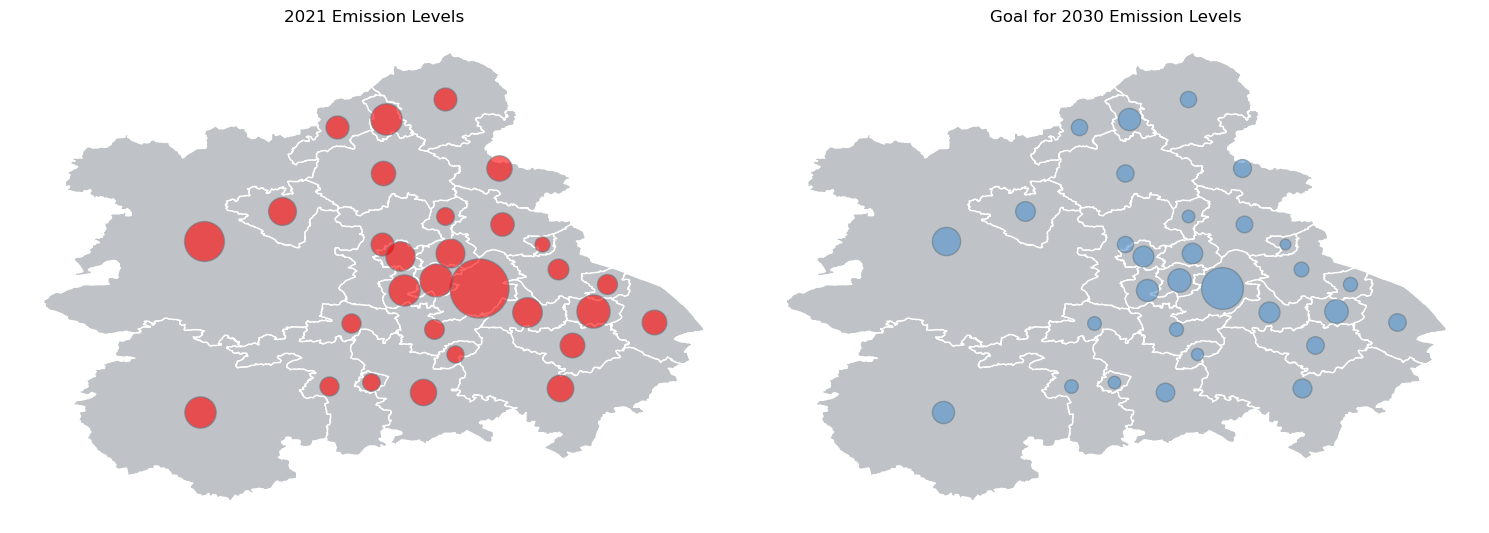

In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first visualization
areas_to_visualize_1 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

# Data for the second visualization
areas_to_visualize_2 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        1811.332706, 200.6550682, 162.3490818, 573.0265451, 505.1733975,
        334.3424338, 507.6777067, 286.4898985, 189.357619,
        275.3396105, 224.7793433, 206.963507, 152.8406061,
        316.7846626, 565.5090754, 823.3160716, 454.5404348, 271.711019,
        308.0787612, 272.6318173, 509.3284256, 367.6117736,
        117.0974507, 400.8686761, 433.1302487, 317.2801606, 444.4469002,
        159.3071428, 358.628281, 191.3015173
    ]
}


# Read shapefile
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Prepare the dataframes
West_Midlands_emissions_df_1 = pd.DataFrame(areas_to_visualize_1)
West_Midlands_emissions_df_2 = pd.DataFrame(areas_to_visualize_2)

# Filtered GeoDataFrame for the first visualization
filtered_gdf_1 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_1["Local Authority"])]
filtered_gdf_1 = filtered_gdf_1.merge(West_Midlands_emissions_df_1, left_on='LAD13NM', right_on='Local Authority')

# Filtered GeoDataFrame for the second visualization
filtered_gdf_2 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_2["Local Authority"])]
filtered_gdf_2 = filtered_gdf_2.merge(West_Midlands_emissions_df_2, left_on='LAD13NM', right_on='Local Authority')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for the first visualization
ax1 = axes[0]
filtered_gdf_1.plot(ax=ax1, color='#BFC2C6', edgecolor='white', legend=True)
ax1.set_title('2021 Emission Levels')
ax1.axis('off')

# Add markers for the first visualization
for idx, row in filtered_gdf_1.iterrows():
    centroid = row['geometry'].centroid
    ax1.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Plot for the second visualization
ax2 = axes[1]
filtered_gdf_2.plot(ax=ax2, color='#BFC2C6', edgecolor='white', legend=True)
ax2.set_title('Goal for 2030 Emission Levels')
ax2.axis('off')

# Add markers for the second visualization
for idx, row in filtered_gdf_2.iterrows():
    centroid = row['geometry'].centroid
    ax2.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='#5492CD', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

In [46]:
!pip install hvplot


In [47]:
import pandas as pd
import numpy as np
import panel as pn

pn.extension('tabulator')

import hvplot.pandas

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/GeneralContent/master/owid-co2-data-Copy.csv')

In [49]:
df

iso_code      country  year     co2  co2_per_capita  trade_co2  \
0          AFG  Afghanistan  1949   0.015           0.002        NaN   
1          AFG  Afghanistan  1950   0.084           0.011        NaN   
2          AFG  Afghanistan  1951   0.092           0.012        NaN   
3          AFG  Afghanistan  1952   0.092           0.012        NaN   
4          AFG  Afghanistan  1953   0.106           0.013        NaN   
...        ...          ...   ...     ...             ...        ...   
25984      ZWE     Zimbabwe  2016  10.738           0.765      1.415   
25985      ZWE     Zimbabwe  2017   9.582           0.673      1.666   
25986      ZWE     Zimbabwe  2018  11.854           0.821      1.308   
25987      ZWE     Zimbabwe  2019  10.949           0.748      1.473   
25988      ZWE     Zimbabwe  2020  10.531           0.709        NaN   

       cement_co2  cement_co2_per_capita  coal_co2  coal_co2_per_capita  ...  \
0             NaN                    NaN     0.015                0.002  ...   
1             NaN                    NaN     0.021                0.003  ...   
2             NaN                    NaN     0.026                0.003  ...   
3             NaN                    NaN     0.032                0.004  ...   
4             NaN                    NaN     0.038                0.005  ...   
...           ...                    ...       ...                  ...  ...   
25984       0.639                  0.046     6.959                0.496  ...   
25985       0.678                  0.048     5.665                0.398  ...   
25986       0.697                  0.048     7.101                0.492  ...   
25987       0.697                  0.048     6.020                0.411  ...   
25988       0.697                  0.047     6.257                0.421  ...   

       ghg_excluding_lucf_per_capita  methane  methane_per_capita  \
0                                NaN      NaN                 NaN   
1                                NaN      NaN                 NaN   
2                                NaN      NaN                 NaN   
3                                NaN      NaN                 NaN   
4                                NaN      NaN                 NaN   
...                              ...      ...                 ...   
25984                          2.076    11.50               0.820   
25985                          2.023    11.62               0.816   
25986                          2.173    11.96               0.828   
25987                            NaN      NaN                 NaN   
25988                            NaN      NaN                 NaN   

       nitrous_oxide  nitrous_oxide_per_capita  population           gdp  \
0                NaN                       NaN   7624058.0           NaN   
1                NaN                       NaN   7752117.0  9.421400e+09   
2                NaN                       NaN   7840151.0  9.692280e+09   
3                NaN                       NaN   7935996.0  1.001733e+10   
4                NaN                       NaN   8039684.0  1.063052e+10   
...              ...                       ...         ...           ...   
25984           6.21                     0.443  14030338.0  2.096179e+10   
25985           6.35                     0.446  14236599.0  2.194784e+10   
25986           6.59                     0.456  14438812.0  2.271535e+10   
25987            NaN                       NaN  14645473.0           NaN   
25988            NaN                       NaN  14862927.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
0                             NaN                NaN             NaN  
1                             NaN                NaN             NaN  
2                             NaN                NaN             NaN  
3                             NaN                NaN             NaN  
4                             NaN                NaN             NaN  
...         

In [50]:
df[df['country'] == 'World']

iso_code country  year        co2  co2_per_capita  trade_co2  \
25458  OWID_WRL   World  1750      9.351           0.012        NaN   
25459  OWID_WRL   World  1751      9.351             NaN        NaN   
25460  OWID_WRL   World  1752      9.354             NaN        NaN   
25461  OWID_WRL   World  1753      9.354             NaN        NaN   
25462  OWID_WRL   World  1754      9.358             NaN        NaN   
...         ...     ...   ...        ...             ...        ...   
25724  OWID_WRL   World  2016  35452.459           4.750       -0.0   
25725  OWID_WRL   World  2017  35925.738           4.760        0.0   
25726  OWID_WRL   World  2018  36646.140           4.802       -0.0   
25727  OWID_WRL   World  2019  36702.503           4.758        0.0   
25728  OWID_WRL   World  2020  34807.259           4.465        0.0   

       cement_co2  cement_co2_per_capita   coal_co2  coal_co2_per_capita  ...  \
25458         NaN                    NaN      9.351                0.012  ...   
25459         NaN                    NaN      9.351                  NaN  ...   
25460         NaN                    NaN      9.354                  NaN  ...   
25461         NaN                    NaN      9.354                  NaN  ...   
25462         NaN                    NaN      9.358                  NaN  ...   
...           ...                    ...        ...                  ...  ...   
25724    1478.758                  0.198  14360.628                1.924  ...   
25725    1500.493                  0.199  14453.702                1.915  ...   
25726    1566.740                  0.205  14718.145                1.929  ...   
25727    1608.472                  0.208  14573.219                1.889  ...   
25728    1626.371                  0.209  13976.098                1.793  ...   

       ghg_excluding_lucf_per_capita  methane  methane_per_capita  \
25458                            NaN      NaN                 NaN   
25459                            NaN      NaN                 NaN   
25460                            NaN      NaN                 NaN   
25461                            NaN      NaN                 NaN   
25462                            NaN      NaN                 NaN   
...                              ...      ...                 ...   
25724                          6.184  8172.01               1.095   
25725                          6.197  8228.64               1.090   
25726                          6.238  8298.27               1.089   
25727                            NaN      NaN                 NaN   
25728                            NaN      NaN                 NaN   

       nitrous_oxide  nitrous_oxide_per_capita    population           gdp  \
25458            NaN                       NaN  7.456644e+08           NaN   
25459            NaN                       NaN           NaN           NaN   
25460            NaN                       NaN           NaN           NaN   
25461            NaN                       NaN           NaN           NaN   
25462            NaN                       NaN           NaN           NaN   
...              ...                       ...           ...           ...   
25724        3027.74                     0.406  7.464344e+09  1.071343e+14   
25725        3078.27                     0.408  7.548183e+09  1.104307e+14   
25726        3063.75                     0.402  7.631091e+09  1.136302e+14   
25727            NaN                       NaN  7.713468e+09           NaN   
25728            NaN                       NaN  7.794799e+09           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
25458                         NaN                NaN             NaN  
25459                         NaN                NaN             NaN  
25460                         NaN                NaN             NaN  
25461                         NaN                NaN             NaN  
25462                         NaN                NaN        

In [51]:
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population']!=0, df['gdp']/df['population'],0)

In [52]:
idf = df.interactive()

In [53]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
year_slider

IntSlider(end=2020, name='Year slider', start=1750, step=5, value=1850)

In [54]:
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['co2','co2_per_capita',],
    button_type='success'
)

In [55]:
continents = ['World','Asia','Oceania','Europe','Africa','North America','South America','Antarctica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider)&
        (idf.country.isin(continents))
    ]
    .groupby(['country','year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [56]:
co2_pipeline

In [57]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title='CO2 emission by continent ')
co2_plot

In [58]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
co2_table

In [59]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider)&
        (~(idf.country.isin(continents)))
    ]
    .groupby(['country','year','gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [60]:
co2_vs_gdp_scatterplot_pipeline

In [61]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', y='co2', by='country', size=80, kind='scatter', alpha=0.7, legend=False, height=500, width=500 )
co2_vs_gdp_scatterplot


In [62]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['coal_co2','oil_co2','gas_co2'],
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe','Africa','North America','Antarctica']
co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slider)&
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year','country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [63]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', x='country', y=yaxis_co2_source, title='CO2 source by continent')
co2_source_bar_plot

In [64]:
!pip install panel

In [65]:
!pip install panel bokeh holoviews

In [66]:
pip install panel bokeh holoviews pandas numpy


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
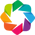

In [67]:
import panel as pn
import bokeh

# Initialize holoviews just in case it's used later
import holoviews as hv
hv.extension('bokeh')

# Now load the Panel extension for Bokeh
pn.extension()


In [68]:
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard',
    sidebar=[pn.pane.Markdown('# CO2 Emissions and Climate Change'),
             pn.pane.Markdown('#### Carbon dioxide emissions are the primary driver of global climate change. '),
             pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown('## Settings'),
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2,
                           co2_plot.panel(width=700), margin=(0,25)),
                  co2_table.panel(width=500)),
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)),
                           pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color='#88d8b0',
    header_background='#88d8b0',
)
template.servable();

In [69]:
pip install panel


Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import geopandas as gpd
import hvplot.pandas  # Extends Pandas DataFrame with hvplot method
import panel as pn

# Load your data
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Assume you have a DataFrame 'df' ready with 'Year', 'Local Authority', and 'Emissions' columns
# Example DataFrame creation for illustration:
data = {
    "Year": [2021, 2030] * 15,
    "Local Authority": ["Birmingham", "Bromsgrove"] * 15,
    "Emissions": [3622.665, 401.310] * 15
}
df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = topo_lad_gdf.merge(df, on="Local Authority")

# Make DataFrame interactive
idf = gdf.interactive()

# Widgets
year_slider = pn.widgets.IntSlider(name='Year', start=2020, end=2030, step=1, value=2021)
yaxis_co2 = pn.widgets.RadioButtonGroup(name='Emissions Type', options=['CO2', 'NOx'], button_type='success')

# Plotting function
def plot_map(year, emission_type):
    data = idf[idf.Year == year]
    return data.hvplot(
        geo=True, c='Emissions', cmap='viridis', hover_cols=['Local Authority'],
        tiles='OSM', frame_width=700, frame_height=500,
        colorbar=True, toolbar='above', alpha=0.6
    )

# Dynamic map bound to widgets
dynamic_map = pn.bind(plot_map, year=year_slider, emission_type=yaxis_co2)

# Create Panel dashboard
dashboard = pn.Column(pn.Row(year_slider, yaxis_co2), dynamic_map)
dashboard.servable()


KeyError: 'Local Authority'

In [73]:
print(topo_lad_gdf.columns)
print(df.columns)


Index(['Unnamed: 0', 'id', 'LAD13CD', 'LAD13CDO', 'LAD13NM', 'LAD13NMW',
       'geometry'],
      dtype='object')
Index(['Year', 'Local Authority', 'Emissions'], dtype='object')


In [74]:
topo_lad_gdf.rename(columns={'LAD13NM': 'Local Authority'}, inplace=True)


In [75]:
gdf = topo_lad_gdf.merge(df, on="Local Authority")


In [76]:
print(topo_lad_gdf.empty)
print(df.empty)


False
False


In [77]:
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

if topo_lad_df.empty:
    print("Data not loaded properly.")
else:
    print("Data loaded successfully. Proceeding with conversions.")
    topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))


Data loaded successfully. Proceeding with conversions.


In [78]:
print("Columns in topo_lad_gdf:", topo_lad_gdf.columns)
print("Columns in df:", df.columns)


Columns in topo_lad_gdf: Index(['Unnamed: 0', 'id', 'LAD13CD', 'LAD13CDO', 'LAD13NM', 'LAD13NMW',
       'geometry'],
      dtype='object')
Columns in df: Index(['Year', 'Local Authority', 'Emissions'], dtype='object')


In [79]:
# This is just an example. You need to adjust based on actual column names.
topo_lad_gdf.rename(columns={'LAD13NM': 'Local Authority'}, inplace=True)


In [80]:
gdf = topo_lad_gdf.merge(df, on="Local Authority")
print("Merge successful. Number of rows in merged DataFrame:", len(gdf))


Merge successful. Number of rows in merged DataFrame: 30


In [81]:
if gdf.empty:
    print("Merge resulted in an empty DataFrame. Check data alignment or filtering criteria.")
else:
    print("Merge successful. Proceed with further operations.")


Merge successful. Proceed with further operations.


In [82]:
import hvplot.pandas
import panel as pn


In [83]:
year_slider = pn.widgets.IntSlider(name='Year', start=2020, end=2030, step=1, value=2021)
emission_type_selector = pn.widgets.RadioButtonGroup(name='Emission Type', options=['CO2', 'NOx'], button_type='success')


In [84]:
def create_plot(year, emission_type):
    filtered_data = gdf[gdf['Year'] == year]
    return filtered_data.hvplot(
        geo=True, c='Emissions', cmap='viridis', hover_cols=['Local Authority'],
        tiles='OSM', frame_width=700, frame_height=500,
        colorbar=True, toolbar='above', alpha=0.6
    )


In [85]:
dynamic_plot = pn.bind(create_plot, year=year_slider, emission_type=emission_type_selector)


In [86]:
dashboard = pn.Column(
    pn.Row(year_slider, emission_type_selector),
    dynamic_plot
)

dashboard.servable(title='Dynamic Emissions Visualization')


ImportError: Geographic projection support requires: cartopy, geoviews.

In [87]:
pip install Cartopy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for Cartopy from https://files.pythonhosted.org/packages/e1/a2/a450fe2d20be42c6666a5146697a6ea1ab9caa1940cce892af02b492c3db/Cartopy-0.23.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyshp>=2.3 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     -------------------- ----------------- 30.7/56.0 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 415.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [88]:
pip install geoviews


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for geoviews from https://files.pythonhosted.org/packages/5e/1f/62ccb9e157acd3c133179a0c77ba68e3afb4cce321e052eb0733b786afe0/geoviews-1.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for bokeh<3.5.0,>=3.4.0 from https://files.pythonhosted.org/packages/1a/02/b312d65b83d0ec17d73e1594118e1163a4d79546925424374922fab2ea09/bokeh-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.2 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for panel>=1.0.0 from https://files.pythonhosted.or

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [89]:
import cartopy.crs as ccrs
import geoviews as gv

print("Cartopy and GeoViews are successfully installed!")


KeyboardInterrupt: 

In [1]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/image.png'
# Since the file provided is an image, we'll assume we need to use a different source as this image is not directly readable for analysis.
# Here, I'll simulate the dataset using a similar structure based on the image provided.

data = {
    "unique_id": ["61D8894E", "80E1AA99", "8F1B26BE", "8F1B26BE", "2A289E9F", "39019C2A", "666758D7", "2C086122", 
                  "CBF12709", "7011B10A", "CFF4A812", "06A075CB", "0DEED7F6"],
    "price_paid": [1034, 3750, 3750, 3750, 6495, 8000, 8350, 10000, 10000, 10000, 11000, 12000, 12500],
    "deed_date": ["21/11/2017", "23/11/2018", "31/05/2019", "13/06/2019", "23/02/1996", "16/09/1996", "26/10/2017", 
                  "22/05/1996", "19/08/1996", "22/07/2014", "25/05/2010", "19/06/1996", "11/10/1996"],
    "postcode": ["B29 6NA", "B29 6TX", "B29 6FS", "B29 6TZ", "B29 7AF", "B29 7AU", "B29 6QG", "B29 7DE", "B29 6TF", 
                 "B29 6BQ", "B29 6SX", "B29 6JW", "B29 7ND"],
    "property_type": ["O", "O", "O", "O", "T", "T", "O", "T", "T", "O", "T", "T", "T"],
    "new_build": ["N", "Y", "Y", "Y", "N", "N", "N", "N", "N", "N", "N", "N", "N"],
    "estate_type": ["L", "F", "F", "F", "F", "L", "F", "L", "F", "L", "F", "F", "F"],
    "saon": ["", "", "", "", "", "", "", "", "", "", "", "", ""],
    "paon": ["816", "7", "9", "8", "97", "309", "14", "27", "16", "596 - 598", "201", "77", "18"],
    "street": ["BRISTOL ROAD", "PAVILION WAY", "MEADOWS DRIVE", "BOUNDARY VIEW", "DAWLISH ROAD", "DAWLISH ROAD", 
               "BIDEFORD DRIVE", "CORONATION ROAD", "RESERVOIR ROAD", "BRISTOL ROAD", "RESERVOIR ROAD", 
               "GLEAVE ROAD", "WALLACE ROAD"],
    "locality": ["SELLY OAK", "SELLY OAK", "SELLY OAK", "SELLY OAK", "SELLY OAK", "SELLY OAK", "SELLY OAK", "SELLY OAK", 
                 "SELLY OAK", "SELLY OAK", "SELLY OAK", "SELLY OAK", "SELLY PARK"],
    "district": ["BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", 
                 "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM", "BIRMINGHAM"],
    "county": ["WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", 
               "WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", "WEST MIDLANDS", 
               "WEST MIDLANDS"],
    "transaction_category": ["B", "B", "B", "B", "A", "A", "B", "A", "A", "B", "A", "A", "A"]
}

df = pd.DataFrame(data)

# Convert deed_date to datetime format for better analysis
df['deed_date'] = pd.to_datetime(df['deed_date'], format='%d/%m/%Y')

# Display the dataframe
import ace_tools as tools; tools.display_dataframe_to_user(name="Property Data", dataframe=df)

df.head()


ModuleNotFoundError: No module named 'ace_tools'

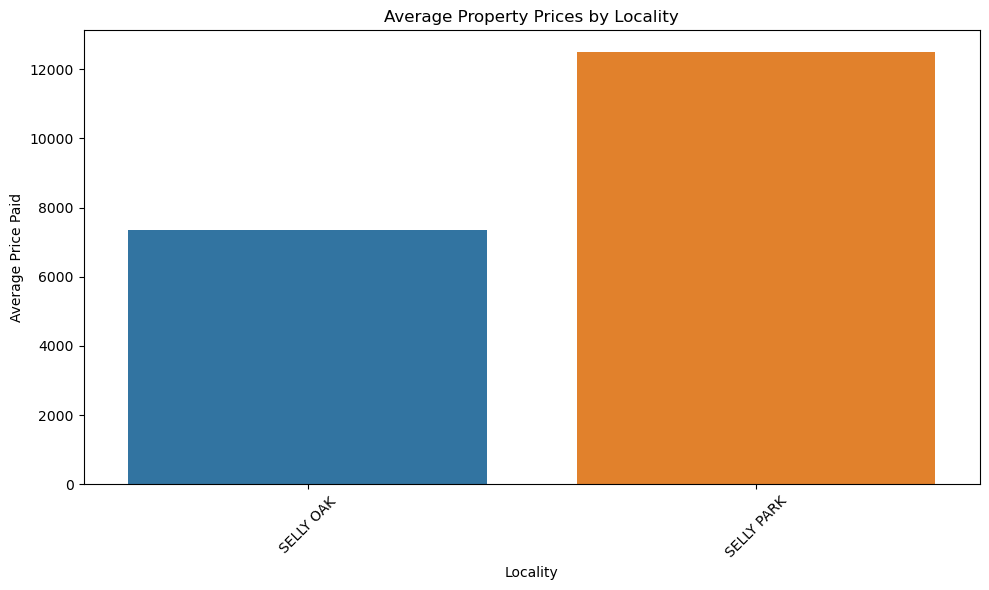

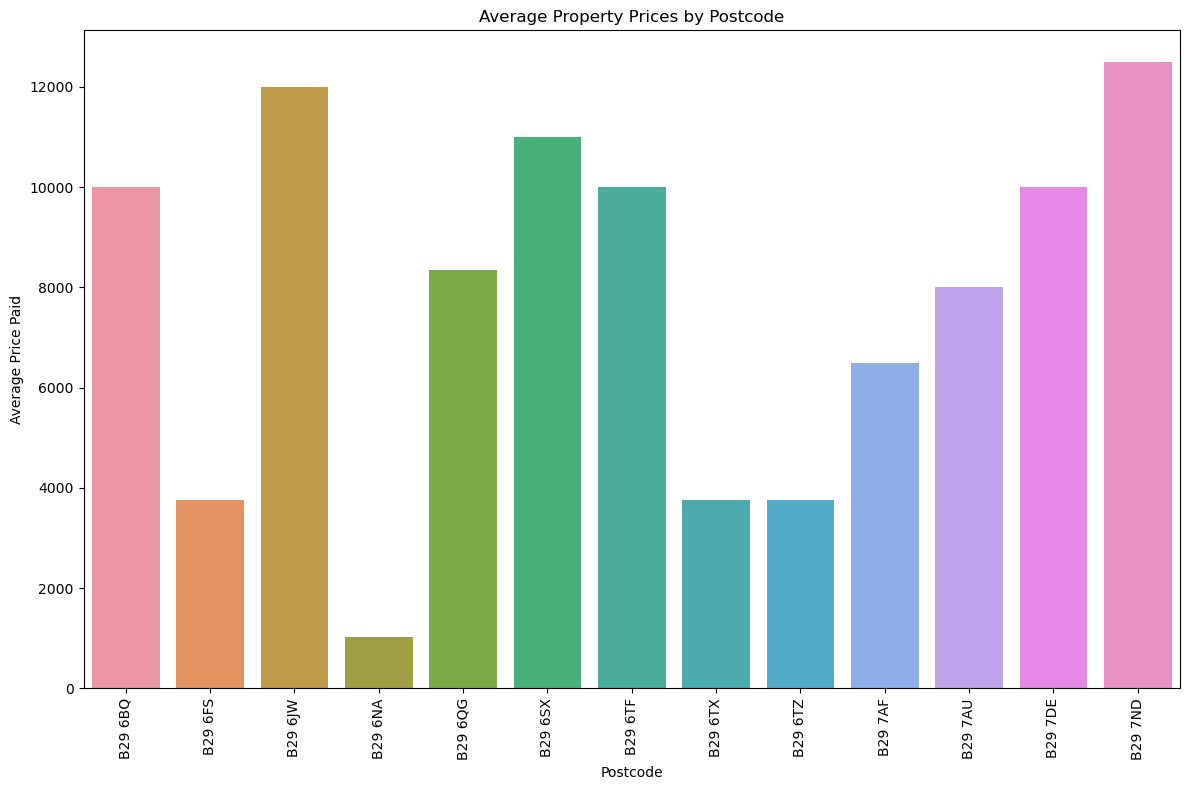

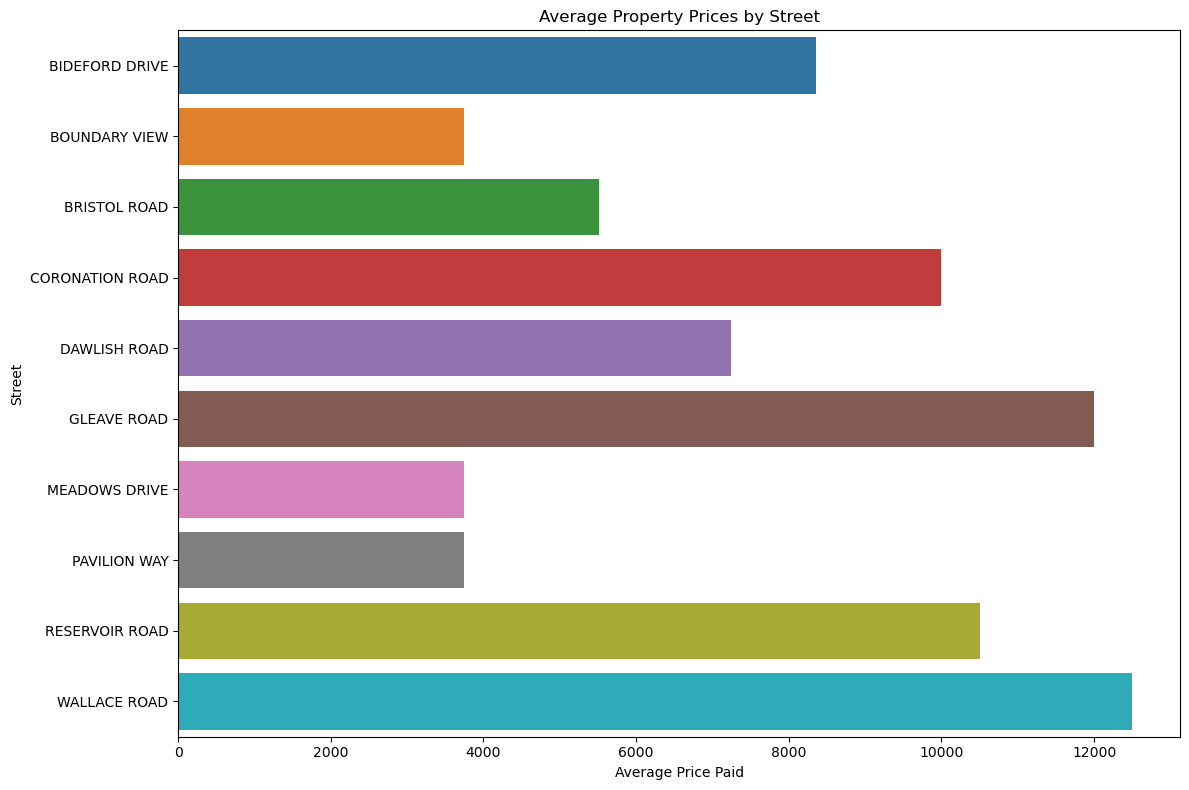

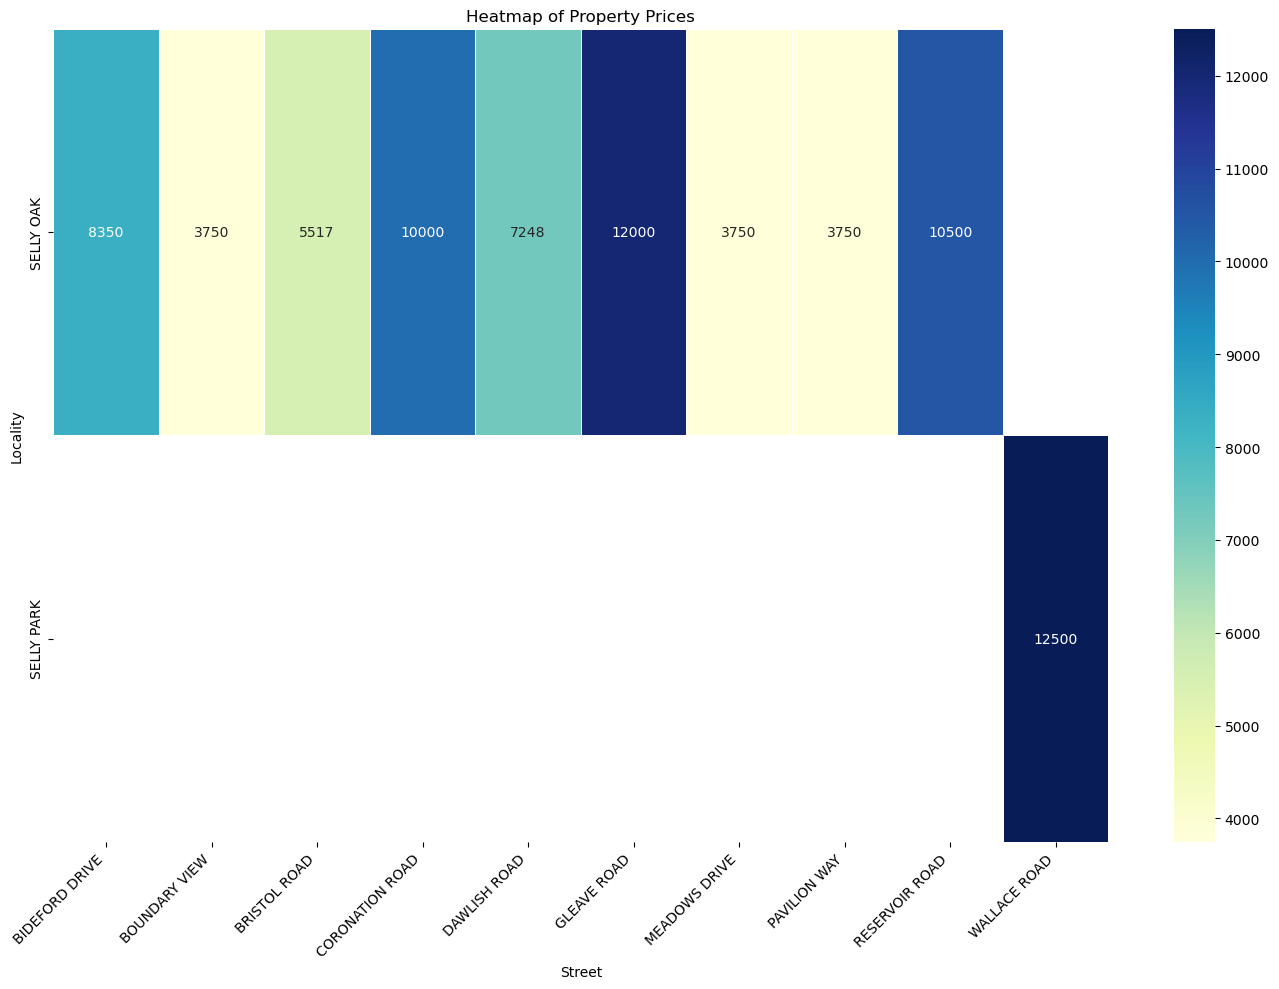

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Price by Locality
locality_price = df.groupby('locality')['price_paid'].mean().reset_index()

# Plotting average price by locality
plt.figure(figsize=(10, 6))
sns.barplot(x='locality', y='price_paid', data=locality_price)
plt.title('Average Property Prices by Locality')
plt.xlabel('Locality')
plt.ylabel('Average Price Paid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price by Postcode
postcode_price = df.groupby('postcode')['price_paid'].mean().reset_index()

# Plotting average price by postcode
plt.figure(figsize=(12, 8))
sns.barplot(x='postcode', y='price_paid', data=postcode_price)
plt.title('Average Property Prices by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Average Price Paid')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Price by Street
street_price = df.groupby('street')['price_paid'].mean().reset_index()

# Plotting average price by street
plt.figure(figsize=(12, 8))
sns.barplot(x='price_paid', y='street', data=street_price, orient='h')
plt.title('Average Property Prices by Street')
plt.xlabel('Average Price Paid')
plt.ylabel('Street')
plt.tight_layout()
plt.show()

# Heatmap
# Creating a pivot table for heatmap
heatmap_data = df.pivot_table(values='price_paid', index='locality', columns='street', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Property Prices')
plt.xlabel('Street')
plt.ylabel('Locality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [106]:

import pandas as pd

# Load the Excel file
#file_path = r'C:\Users\Olajide\Downloads\47111660_20242805_0410_.csv'
file_path = r'C:\Users\Olajide\Downloads\47111660_20242805_0410.csv' 
#file_path = r'C:\Users\Olajide\Downloads\47111660_20242805_0410_.csv'
df = pd.read_csv(file_path)

# Define a mapping dictionary to categorize transactions
category_mapping = {
    "ALDI": "Groceries",
    "ASDA": "Groceries",
    "TESCO": "Groceries",
    "LIDL": "Groceries",
    "MORRISONS": "Groceries",
    "WAITROSE": "Groceries",
    "Samis": "Groceries",
    "CO OP": "Groceries",
    "co-op": "Groceries",
    "FARMFOODS": "Groceries",
    "HOME BARGAINS": "Groceries",
    "ICELAND": "Groceries",
    "MS Cosmetics": "Groceries",
    "My Hair My Beauty": "Groceries",
    "ONE STOP": "Groceries",
    "PEP": "Groceries",
    "POUNDLAND": "Groceries",
    "SAVERS": "Groceries",
    "Selly park conveni": "Groceries",
    "UNIVERSITY SUPERST": "Groceries",
    "World Food Superst": "Groceries",
    "NATIONAL EXPRESS": "Transport",
    "NX BUS": "Transport",
    "TRAINLINE": "Transport",
    "RAILCARD": "Transport",
    "Beryl": "Transport",
    "T/O": "Transport",
    "WEST MIDLANDS METR": "Transport",
    "Uber": "Transport",
    "bolt": "Transport",
    "MCDONALDS": "Dining Out",
    "DOMINOS": "Dining Out",
    "COSTA": "Dining Out",
    "GREGGS": "Dining Out",
    "BIG JOHN": "Dining Out",
    "Caspian": "Dining Out",
    "Dixy": "Dining Out",
    "DR SHAWARMA": "Dining Out",
    "Empress": "Dining Out",
    "GOOSE": "Dining Out",
    "HAMS HALL DEPOT": "Dining Out",
    "Just Eat": "Dining Out",
    "KFC": "Dining Out",
    "King of Kings": "Dining Out",
    "NY": "Dining Out",
    "BrewDog": "Dining Out",
    "RIO": "Dining Out",
    "SHERE": "Dining Out",
    "CIAO BELLA": "Dining Out",
    "SUBWAY": "Dining Out",
    "TIM HORTONS": "Dining Out",
    "TooGood": "Dining Out",
    "Hobbycraft": "Shopping",
    "THEWORKS": "Shopping",
    "PRIMARK": "Shopping",
    "MARKS & SPENCER": "Shopping",
    "BOOTS": "Shopping",
    "UNITE RENT COLLECT": "Bills/Rent",
    "SPACE STATION": "Bills/Rent",
    "MORAN PROPERTIES": "Bills/Rent",
    "M NORMAN": "Bills/Rent",
    "TARIQ KHATTAK": "Bills/Rent",
    "VICTOR OKHAWERE": "Bills/Rent",
    "Netflix": "entertainment",
    "Cineworld": "entertainment",
    
    
    # Add more keywords and categories as needed
}

# Function to categorize transactions based on description
def categorize_transaction(description):
    for keyword, category in category_mapping.items():
        if keyword.lower() in description.lower():
            return category
    return "Miscellaneous"

# Apply the categorization function to each row
df['Category'] = df['Transaction Description'].apply(categorize_transaction)

# Save the categorized data back to an Excel file
output_file = 'categorized_transactions_2.xlsx'
df.to_excel(output_file, index=False)

print(f"Categorized transactions saved to {output_file}")





Categorized transactions saved to categorized_transactions_2.xlsx


In [107]:
# Convert 'Transaction Date' to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d/%m/%Y')

# Extract the month and year for grouping
df['Month'] = df['Transaction Date'].dt.to_period('M')

# Filter to only Debit amounts (expenses)
df_filtered = df[df['Debit Amount'] > 0]

# Group by Month and Category, and sum the Debit Amount (expenses)
monthly_expenses = df_filtered.groupby(['Month', 'Category'])['Debit Amount'].sum().unstack().fillna(0)

# Display the monthly grouped data
monthly_expenses.head()


Category  Bills/Rent  Dining Out  Groceries  Miscellaneous  Shopping  \
Month                                                                  
2022-12          0.0         0.0        0.0          300.0       0.0   
2023-01       1510.0         0.0        0.0          340.0       0.0   
2023-02          0.0         0.0        0.0          100.0       0.0   
2023-03          0.0         0.0        0.0          300.0       0.0   
2023-04          0.0         0.0        0.0          500.0       0.0   

Category  Transport  entertainment  
Month                               
2022-12         0.0            0.0  
2023-01         0.0            0.0  
2023-02         0.0            0.0  
2023-03         0.0            0.0  
2023-04         0.0            0.0

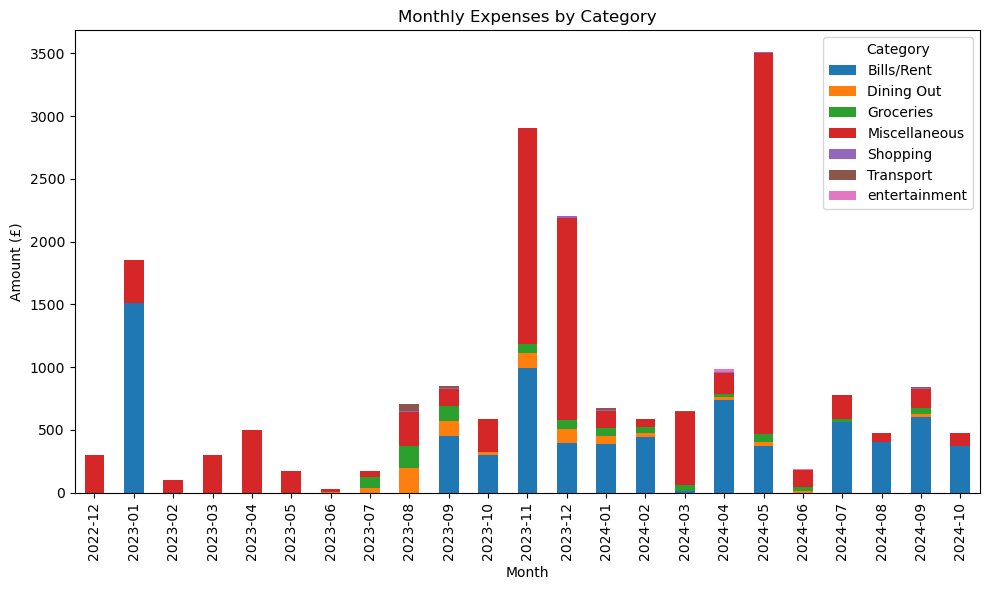

In [108]:
# Plot stacked bar chart for monthly expenses by category
import matplotlib.pyplot as plt

monthly_expenses.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Expenses by Category')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [109]:
import pandas as pd

# Load current bank statement
current_report_path = r'C:\Users\Olajide\Downloads\categorized_transactions_2.xlsx'
current_report = pd.read_excel(current_report_path)

# Load the new bank statement
new_statement_path = r'C:\Users\Olajide\Downloads\account-statement_2022-10-01_2024-10-05_en-gb_1fd8af_.xlsx'
new_statement = pd.read_excel(new_statement_path)

# Load the new bank statement
new_statement_path_1 = r'C:\Users\Olajide\Downloads\account-statement_2022-10-01_2024-10-06_euro.xlsx'
new_statement_1 = pd.read_excel(new_statement_path_1)

# Align columns in new statement to match current report (assuming 'Amount' maps to Debit or Credit)
# Adding 'Debit Amount' and 'Credit Amount' columns based on 'Amount' in the new statement
new_statement['Debit Amount'] = new_statement['Amount'].apply(lambda x: -x if x < 0 else 0)
new_statement['Credit Amount'] = new_statement['Amount'].apply(lambda x: x if x > 0 else 0)


# Align columns in new statement to match current report (assuming 'Amount' maps to Debit or Credit)
# Adding 'Debit Amount' and 'Credit Amount' columns based on 'Amount' in the new statement
new_statement_1['Debit Amount'] = new_statement_1['Amount'].apply(lambda x: -x if x < 0 else 0)
new_statement_1['Credit Amount'] = new_statement_1['Amount'].apply(lambda x: x if x > 0 else 0)




# Renaming columns in the new statement to match the current report (if necessary)
new_statement.rename(columns={
    'Started Date': 'Transaction Date',
    'Type': 'Transaction Type',
    'Description': 'Transaction Description',
    # Add other mappings if needed
}, inplace=True)

# Renaming columns in the new statement to match the current report (if necessary)
new_statement_1.rename(columns={
    'Started Date': 'Transaction Date',
    'Type': 'Transaction Type',
    'Description': 'Transaction Description',
    'Currency': 'Currency',
    # Add other mappings if needed
}, inplace=True)

# Function to convert currencies to GBP
def convert_to_gbp(row):
    if row['Currency'] == 'EUR':
        return row['Amount'] * 0.85  # Convert EUR to GBP
    elif row['Currency'] == 'USD':
        return row['Amount'] * 0.75  # Convert USD to GBP
    return row['Amount']  # Assume GBP is already in GBP

# Apply the conversion
new_statement_1['Amount in GBP'] = new_statement_1.apply(convert_to_gbp, axis=1)

# Align columns in new statement to match current report (assuming 'Amount' maps to Debit or Credit)
# Adding 'Debit Amount' and 'Credit Amount' columns based on 'Amount' in the new statement
new_statement_1['Debit Amount'] = new_statement_1['Amount in GBP'].apply(lambda x: -x if x < 0 else 0)
new_statement_1['Credit Amount'] = new_statement_1['Amount in GBP'].apply(lambda x: x if x > 0 else 0)



# Select only the relevant columns from new_statement to align with the current report
new_statement = new_statement[['Transaction Date', 'Transaction Type', 'Transaction Description', 'Debit Amount', 'Credit Amount', 'Balance']]

# Select only the relevant columns from new_statement to align with the current report
new_statement_1 = new_statement_1[['Transaction Date', 'Transaction Type', 'Transaction Description', 'Debit Amount', 'Credit Amount', 'Balance']]



# Concatenate the two DataFrames pd.concat([current_report, new_statement ,new_statement_1
merged_report = pd.concat([current_report, new_statement, new_statement_1])

# Convert 'Transaction Date' to datetime, specifying dayfirst=True
merged_report['Transaction Date'] = pd.to_datetime(merged_report['Transaction Date'], dayfirst=True)

# Sort the merged report by 'Transaction Date'
merged_report = merged_report.sort_values('Transaction Date')

# Save the merged report to a new CSV file
merged_report.to_csv(r'C:\Users\Olajide\Downloads\merged_bank_statements.csv', index=False)


# Sort the report by Transaction Date (optional but recommended)
#merged_report['Transaction Date'] = pd.to_datetime(merged_report['Transaction Date'])
#merged_report = merged_report.sort_values('Transaction Date')

# Save the merged report to a new CSV file
#merged_report.to_csv('path_to_merged_report.csv', index=False)

print("Merged report created successfully!")


Merged report created successfully!


In [110]:
new_statement_1.columns

Index(['Transaction Date', 'Transaction Type', 'Transaction Description',
       'Debit Amount', 'Credit Amount', 'Balance'],
      dtype='object')

In [111]:

import pandas as pd

# Load the Excel file
#file_path = r'C:\Users\Olajide\Downloads\47111660_20242805_0410_.csv'
file_path = r'C:\Users\Olajide\Downloads\merged_bank_statements.csv' 
#file_path = r'C:\Users\Olajide\Downloads\47111660_20242805_0410_.csv'
df = pd.read_csv(file_path)

# Define a mapping dictionary to categorize transactions
category_mapping = {
    "ALDI": "Groceries",
    "ASDA": "Groceries",
    "TESCO": "Groceries",
    "LIDL": "Groceries",
    "MORRISONS": "Groceries",
    "WAITROSE": "Groceries",
    "Samis": "Groceries",
    "CO OP": "Groceries",
    "co-op": "Groceries",
    "FARMFOODS": "Groceries",
    "HOME BARGAINS": "Groceries",
    "ICELAND": "Groceries",
    "MS Cosmetics": "Groceries",
    "My Hair My Beauty": "Groceries",
    "ONE STOP": "Groceries",
    "PEP": "Groceries",
    "POUNDLAND": "Groceries",
    "SAVERS": "Groceries",
    "Selly park conveni": "Groceries",
    "UNIVERSITY SUPERST": "Groceries",
    "World Food Superst": "Groceries",
    "NATIONAL EXPRESS": "Transport",
    "NX BUS": "Transport",
    "TRAINLINE": "Transport",
    "RAILCARD": "Transport",
    "Beryl": "Transport",
    "T/O": "Transport",
    "WEST MIDLANDS METR": "Transport",
    "Uber": "Transport",
    "bolt": "Transport",
    "MCDONALDS": "Dining Out",
    "DOMINOS": "Dining Out",
    "COSTA": "Dining Out",
    "GREGGS": "Dining Out",
    "BIG JOHN": "Dining Out",
    "Caspian": "Dining Out",
    "Dixy": "Dining Out",
    "DR SHAWARMA": "Dining Out",
    "Empress": "Dining Out",
    "GOOSE": "Dining Out",
    "HAMS HALL DEPOT": "Dining Out",
    "Just Eat": "Dining Out",
    "KFC": "Dining Out",
    "King of Kings": "Dining Out",
    "NY": "Dining Out",
    "BrewDog": "Dining Out",
    "RIO": "Dining Out",
    "SHERE": "Dining Out",
    "CIAO BELLA": "Dining Out",
    "SUBWAY": "Dining Out",
    "TIM HORTONS": "Dining Out",
    "TooGood": "Dining Out",
    "Hobbycraft": "Shopping",
    "THEWORKS": "Shopping",
    "PRIMARK": "Shopping",
    "MARKS & SPENCER": "Shopping",
    "BOOTS": "Shopping",
    "UNITE RENT COLLECT": "Bills/Rent",
    "SPACE STATION": "Bills/Rent",
    "MORAN PROPERTIES": "Bills/Rent",
    "M NORMAN": "Bills/Rent",
    "TARIQ KHATTAK": "Bills/Rent",
    "VICTOR OKHAWERE": "Bills/Rent",
    "Netflix": "entertainment",
    "Cineworld": "entertainment",
    
    
    # Add more keywords and categories as needed
}

# Function to categorize transactions based on description
def categorize_transaction(description):
    for keyword, category in category_mapping.items():
        if keyword.lower() in description.lower():
            return category
    return "Miscellaneous"

# Apply the categorization function to each row
df['Category'] = df['Transaction Description'].apply(categorize_transaction)

# Save the categorized data back to an Excel file
output_file = 'categorized_transactions_merge_2.xlsx'
df.to_excel(output_file, index=False)

print(f"Categorized transactions saved to {output_file}")





Categorized transactions saved to categorized_transactions_merge_2.xlsx


In [53]:
# Convert 'Transaction Date' to datetime, handling mixed formats
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Check for any unparseable dates
unparseable_dates = df[df['Transaction Date'].isna()]

if not unparseable_dates.empty:
    print("Unparseable dates:")
    print(unparseable_dates)

# Extract the month and year for grouping if conversion was successful
df['Month'] = df['Transaction Date'].dt.to_period('M')


In [54]:
# Filter to only Debit amounts (expenses)
df_filtered = df[df['Debit Amount'] > 0]

# Group by Month and Category, and sum the Debit Amount (expenses)
monthly_expenses = df_filtered.groupby(['Month', 'Category'])['Debit Amount'].sum().unstack().fillna(0)

# Display the monthly grouped data
monthly_expenses.head()


Category  Bills/Rent  Dining Out  Groceries  Miscellaneous  Shopping  \
Month                                                                  
2022-11          0.0        0.00      11.45         122.79      0.00   
2022-12          0.0       51.75     115.26         445.57     19.50   
2023-01       1510.0       35.79     139.03         426.38     58.05   
2023-02          0.0       29.18      92.60         121.99      0.00   
2023-03          0.0       88.31      93.75         411.73      6.00   

Category  Transport  entertainment  
Month                               
2022-11         0.0            0.0  
2022-12         0.0            0.0  
2023-01         4.3            0.0  
2023-02         0.0            0.0  
2023-03         0.0            0.0

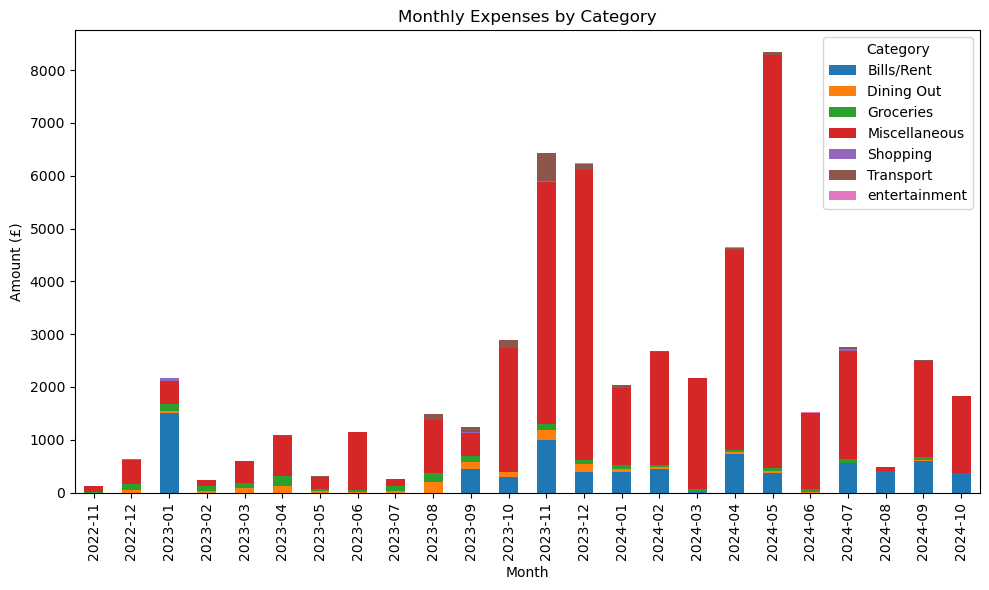

In [55]:
# Plot stacked bar chart for monthly expenses by category
import matplotlib.pyplot as plt

monthly_expenses.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Expenses by Category')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\906896836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceries_df['Transaction Date'] = pd.to_datetime(groceries_df['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\906896836.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceries_df['Month'] = groceries_df['Transaction Date'].dt.to_period('M')


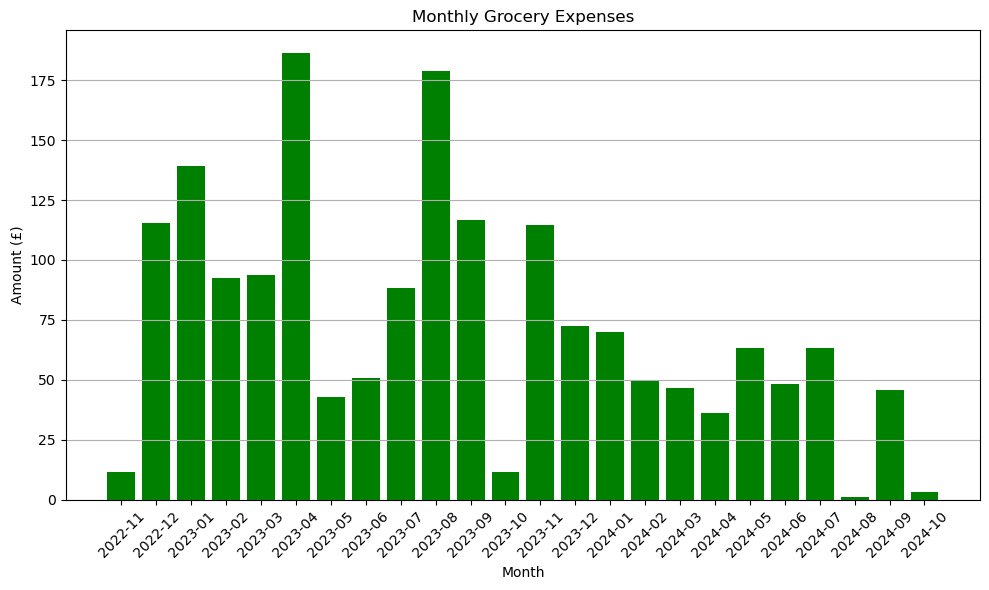

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the DataFrame for groceries
groceries_df = df[df['Category'] == 'Groceries']

# Ensure 'Transaction Date' is in datetime format
groceries_df['Transaction Date'] = pd.to_datetime(groceries_df['Transaction Date'], errors='coerce')

# Extract month and year for grouping
groceries_df['Month'] = groceries_df['Transaction Date'].dt.to_period('M')

# Group by Month and sum the Amount
monthly_groceries = groceries_df.groupby('Month')['Debit Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_groceries['Month'].astype(str), monthly_groceries['Debit Amount'], color='green')
plt.title('Monthly Grocery Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


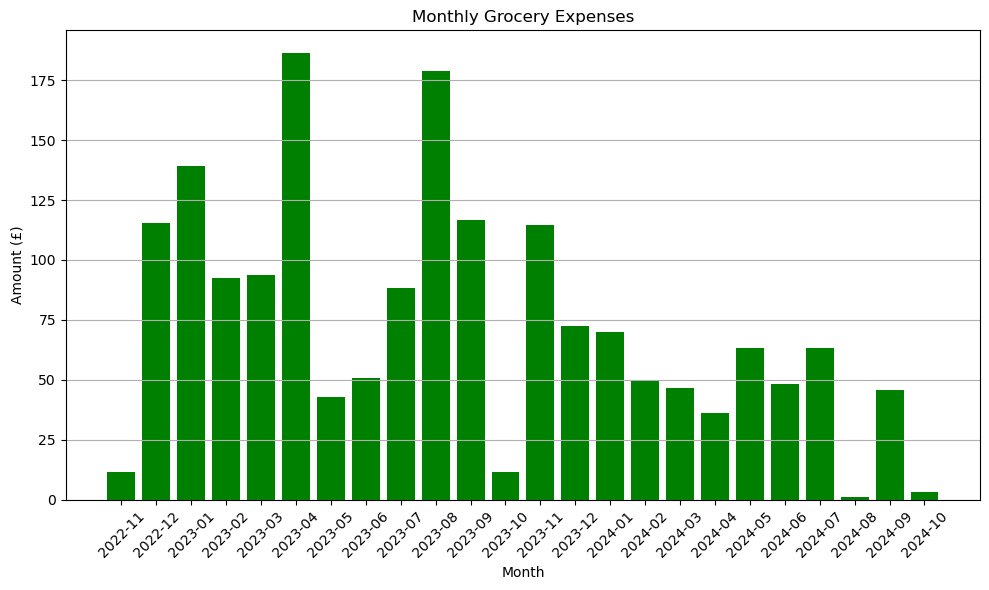

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# because 'df' is your merged DataFrame and contains a 'Category' column
# Filter the DataFrame for groceries
groceries_df = df[df['Category'] == 'Groceries'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Ensure 'Transaction Date' is in datetime format
groceries_df.loc[:, 'Transaction Date'] = pd.to_datetime(groceries_df['Transaction Date'], errors='coerce')

# Extract month and year for grouping
groceries_df.loc[:, 'Month'] = groceries_df['Transaction Date'].dt.to_period('M')

# Group by Month and sum the Amount
monthly_groceries = groceries_df.groupby('Month')['Debit Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_groceries['Month'].astype(str), monthly_groceries['Debit Amount'], color='green')
plt.title('Monthly Grocery Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [60]:
# Compute average grocery expenses
average_groceries_expenses = groceries_df['Debit Amount'].mean()

print(f'Average Grocery Expenses: £{average_groceries_expenses:.2f}')


Average Grocery Expenses: £4.81


In [61]:
# Group by Month and calculate the total Amount for each month
monthly_groceries = groceries_df.groupby('Month')['Debit Amount'].sum()

# Compute the average of the monthly grocery expenses
average_monthly_groceries = monthly_groceries.mean()

print(f'Average Monthly Grocery Expenses: £{average_monthly_groceries:.2f}')


Average Monthly Grocery Expenses: £72.56


In [63]:
# A currency conversion API

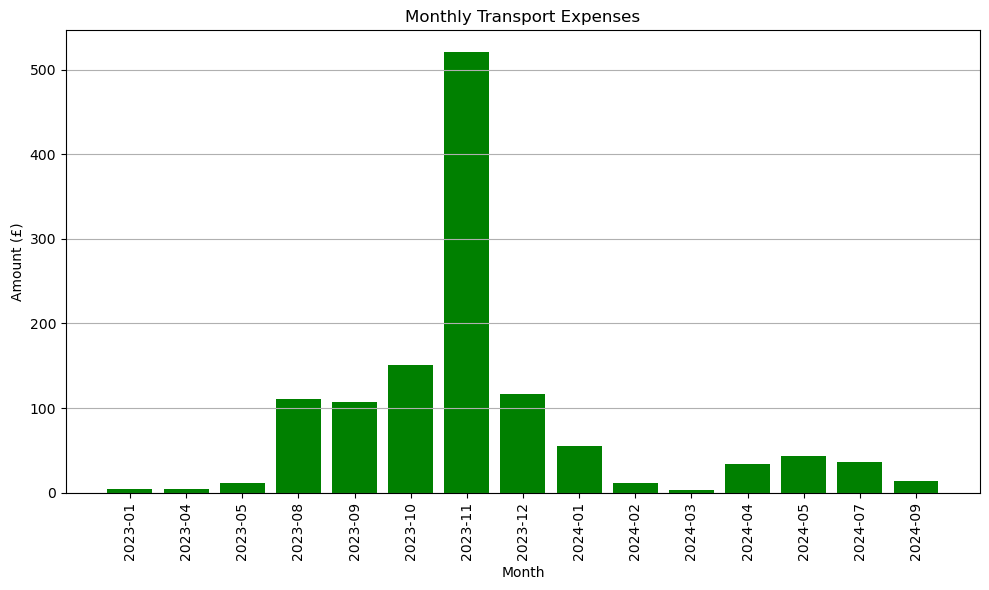

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# because 'df' is your merged DataFrame and contains a 'Category' column
# Filter the DataFrame for Transport
Transport_df = df[df['Category'] == 'Transport'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Ensure 'Transaction Date' is in datetime format
Transport_df.loc[:, 'Transaction Date'] = pd.to_datetime(Transport_df['Transaction Date'], errors='coerce')

# Extract month and year for grouping
Transport_df.loc[:, 'Month'] = Transport_df['Transaction Date'].dt.to_period('M')

# Group by Month and sum the Amount
monthly_Transport = Transport_df.groupby('Month')['Debit Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_Transport['Month'].astype(str), monthly_Transport['Debit Amount'], color='green')
plt.title('Monthly Transport Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [112]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Olajide\Downloads\merged_bank_statements_1.csv' 
df = pd.read_csv(file_path)

# Define a mapping dictionary to categorize transactions
category_mapping = {
    "ALDI": "Groceries",
    "ASDA": "Groceries",
    "TESCO": "Groceries",
    "LIDL": "Groceries",
    "MORRISONS": "Groceries",
    "WAITROSE": "Groceries",
    "Samis": "Groceries",
    "sainsbury": "Groceries",
    "CO OP": "Groceries",
    "co-op": "Groceries",
    "FARMFOODS": "Groceries",
    "HOME BARGAINS": "Groceries",
    "ICELAND": "Groceries",
    "MS Cosmetics": "Groceries",
    "My Hair My Beauty": "Groceries",
    "ONE STOP": "Groceries",
    "PEP": "shopping",
    "POUNDLAND": "Groceries",
    "MARKS": "Others",
    "SAVERS": "Groceries",
    "Selly park conveni": "Groceries",
    "UNIVERSITY SUPERST": "Groceries",
    "World Food": "Groceries",
    "BP": "Groceries",
    "IHS": "Visa",
    "UKVISA": "Visa",
    "OLAJIDE": "Payments",
    "Exchanged": "Crypto",
    "Lebara": "PhoneBill",
    "NATIONAL EXPRESS": "Transport",
    "NX BUS": "Transport",
    "TRAINLINE": "Transport",
    "RAILCARD": "Transport",
    "Beryl": "Transport",
    "T/O": "Transport",
    "WEST MIDLANDS METR": "Transport",
    "Uber": "Transport",
    "bolt": "Transport",
    "Diamond Bus": "Transport",
    "MCDONALDS": "Dining Out",
    "DOMINOS": "Dining Out",
    "COSTA": "Dining Out",
    "GREGGS": "Dining Out",
    "BIG JOHN": "Dining Out",
    "Caspian": "Dining Out",
    "Dixy": "Dining Out",
    "DR SHAWARMA": "Dining Out",
    "Empress": "Dining Out",
    "GOOSE": "Dining Out",
    "HAMS HALL DEPOT": "Dining Out",
    "Just Eat": "Dining Out",
    "KFC": "Dining Out",
    "King of Kings": "Dining Out",
    "NY": "Dining Out",
    "BrewDog": "Dining Out",
    "RIO": "Dining Out",
    "SHERE": "Dining Out",
    "CIAO BELLA": "Dining Out",
    "SUBWAY": "Dining Out",
    "TIM HORTONS": "Dining Out",
    "TooGood": "Dining Out",
    "Hobbycraft": "Shopping",
    "THEWORKS": "Shopping",
    "PRIMARK": "Shopping",
    "BOOTS": "Shopping",
    "UNITE RENT COLLECT": "Bills/Rent",
    "LSAV Rent": "Bills/Rent",
    "SPACE STATION": "Bills/Rent",
    "MORAN PROPERTIES": "Bills/Rent",
    "M NORMAN": "Bills/Rent",
    "TARIQ KHATTAK": "Bills/Rent",
    "VICTOR OKHAWERE": "Bills/Rent",
    "Netflix": "entertainment",
    "Cineworld": "entertainment",
    
    
    # Add more keywords and categories as needed
}

# Function to categorize transactions based on description
def categorize_transaction(description):
    for keyword, category in category_mapping.items():
        if keyword.lower() in description.lower():
            return category
    return "Miscellaneous"

# Apply the categorization function to each row
df['Category'] = df['Transaction Description'].apply(categorize_transaction)

# Save the categorized data back to an Excel file
output_file = 'categorized_transactions_4.xlsx'
df.to_excel(output_file, index=False)

print(f"Categorized transactions saved to {output_file}")





Categorized transactions saved to categorized_transactions_4.xlsx


In [113]:
# Convert 'Transaction Date' to datetime, handling mixed formats
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Check for any unparseable dates
unparseable_dates = df[df['Transaction Date'].isna()]

if not unparseable_dates.empty:
    print("Unparseable dates:")
    print(unparseable_dates)

# Extract the month and year for grouping if conversion was successful
df['Month'] = df['Transaction Date'].dt.to_period('M')

C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\114409748.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')


In [114]:
# Filter to only Debit amounts (expenses)
df_filtered = df[df['Debit Amount'] > 0]

# Group by Month and Category, and sum the Debit Amount (expenses)
monthly_expenses = df_filtered.groupby(['Month', 'Category'])['Debit Amount'].sum().unstack().fillna(0)

# Display the monthly grouped data
monthly_expenses.head()

Category  Bills/Rent  Crypto  Dining Out  Groceries  Miscellaneous  Others  \
Month                                                                        
2022-11        26.19     0.0        0.00      11.45          93.60    0.00   
2022-12         0.00     0.0       51.75     115.26         132.57    0.00   
2023-01      1510.00     0.0       35.79     139.03          76.38    6.05   
2023-02         0.00     0.0       29.18      92.60          18.99    0.00   
2023-03         0.00     0.0       88.31      93.75         101.73    0.00   

Category  Payments  PhoneBill  Shopping  Transport  Visa  entertainment  \
Month                                                                     
2022-11        0.0        3.0       0.0        0.0   0.0            0.0   
2022-12      300.0       13.0      19.5        0.0   0.0            0.0   
2023-01      340.0       10.0      52.0        4.3   0.0            0.0   
2023-02      100.0        3.0       0.0        0.0   0.0            0.0   
2023-03      300.0       10.0       6.0        0.0   0.0            0.0   

Category  shopping  
Month               
2022-11        0.0  
2022-12        0.0  
2023-01        0.0  
2023-02        0.0  
2023-03        0.0

C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4120004775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceries_df['Transaction Date'] = pd.to_datetime(groceries_df['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4120004775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceries_df['Month'] = groceries_df['Transaction Date'].dt.to_period('M')


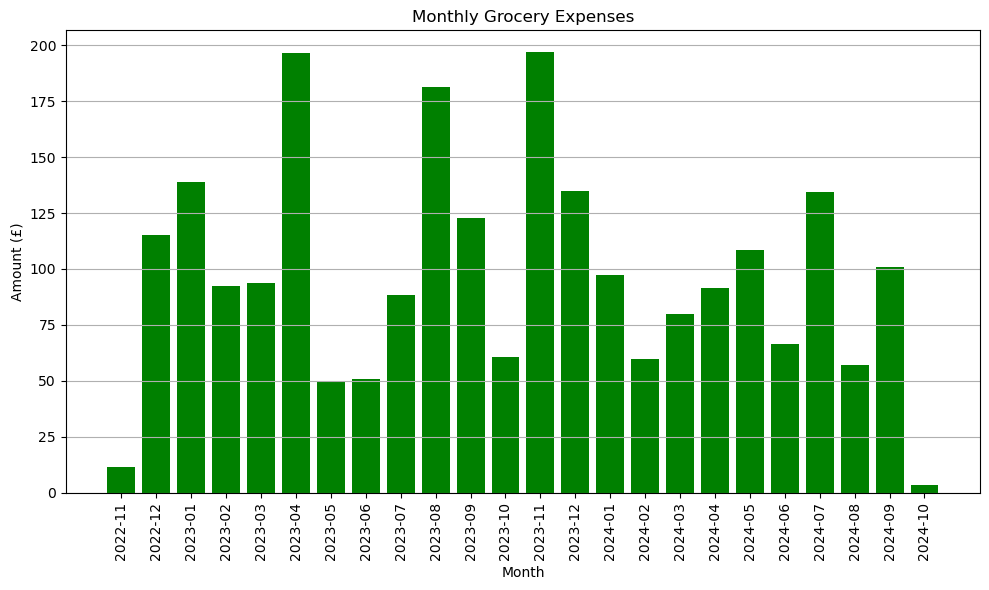

In [115]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the DataFrame for groceries
groceries_df = df[df['Category'] == 'Groceries']

# Ensure 'Transaction Date' is in datetime format
groceries_df['Transaction Date'] = pd.to_datetime(groceries_df['Transaction Date'], errors='coerce')

# Extract month and year for grouping
groceries_df['Month'] = groceries_df['Transaction Date'].dt.to_period('M')

# Group by Month and sum the Amount
monthly_groceries = groceries_df.groupby('Month')['Debit Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_groceries['Month'].astype(str), monthly_groceries['Debit Amount'], color='green')
plt.title('Monthly Grocery Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [118]:
# Filter the DataFrame for Dining Out
Dining_Out_df = df[df['Category'] == 'Dining Out']

# Ensure 'Transaction Date' is in datetime format
Dining_Out_df['Transaction Date'] = pd.to_datetime(Dining_Out_df['Transaction Date'], errors='coerce')

# Extract month and year for grouping
Dining_Out_df['Month'] = Dining_Out_df['Transaction Date'].dt.to_period('M')

# Group by Month and calculate the total Amount for each month
monthly_Dining_Out = Dining_Out_df.groupby('Month')['Debit Amount'].sum()

# Compute the average of the monthly Dining_Out expenses
average_monthly_Dining_Out = monthly_Dining_Out.mean()

print(f'Average Monthly Dining_Out Expenses: £{average_monthly_Dining_Out:.2f}')

Average Monthly Dining_Out Expenses: £63.64


C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\2478940669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dining_Out_df['Transaction Date'] = pd.to_datetime(Dining_Out_df['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\2478940669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dining_Out_df['Month'] = Dining_Out_df['Transaction Date'].dt.to_period('M')


In [116]:
# Group by Month and calculate the total Amount for each month
monthly_groceries = groceries_df.groupby('Month')['Debit Amount'].sum()

# Compute the average of the monthly grocery expenses
average_monthly_groceries = monthly_groceries.mean()

print(f'Average Monthly Grocery Expenses: £{average_monthly_groceries:.2f}')

Average Monthly Grocery Expenses: £97.21


In [ ]:
# Group by Month and calculate the total Amount for each month
monthly_groceries = groceries_df.groupby('Month')['Debit Amount'].sum()

# Compute the average of the monthly grocery expenses
average_monthly_groceries = monthly_groceries.mean()

print(f'Average Monthly Grocery Expenses: £{average_monthly_groceries:.2f}')

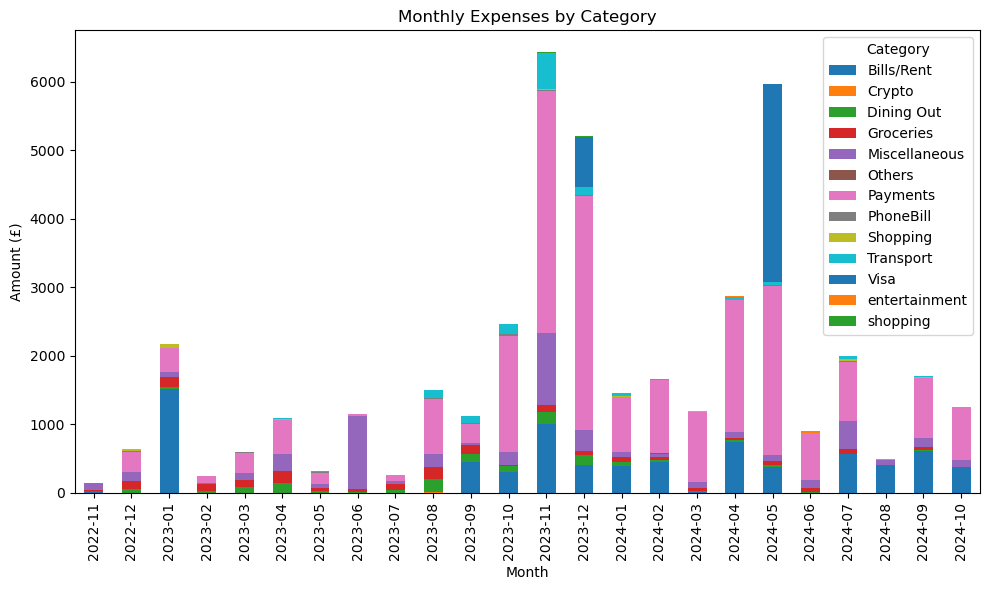

In [94]:
# Plot stacked bar chart for monthly expenses by category
import matplotlib.pyplot as plt

monthly_expenses.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Expenses by Category')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\2096593132.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dining_Out_df['Transaction Date'] = pd.to_datetime(Dining_Out_df['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\2096593132.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dining_Out_df['Month'] = Dining_Out_df['Transaction Date'].dt.to_period('M')


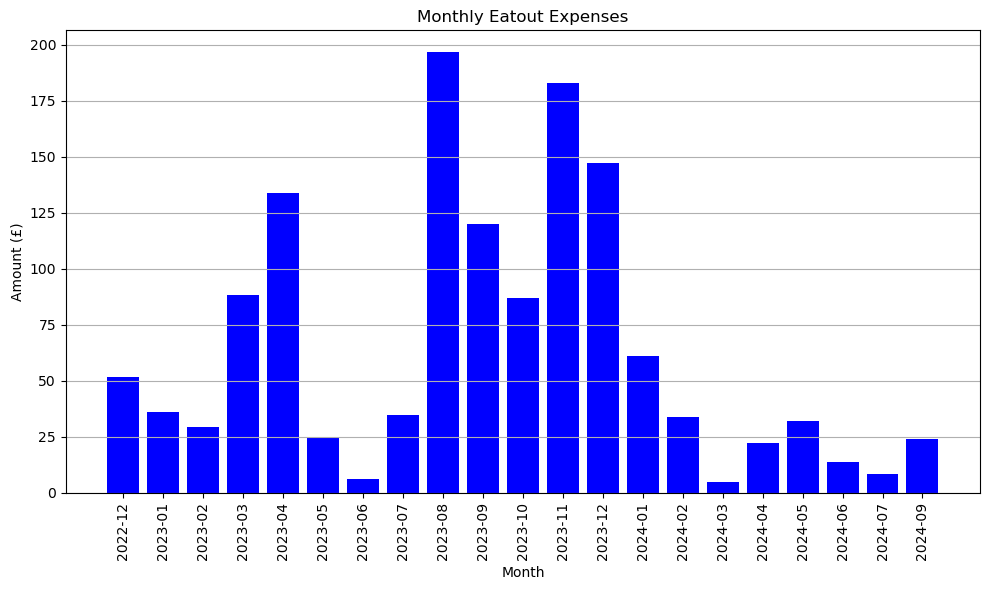

In [103]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the DataFrame for Dining Out
Dining_Out_df = df[df['Category'] == 'Dining Out']

# Ensure 'Transaction Date' is in datetime format
Dining_Out_df['Transaction Date'] = pd.to_datetime(Dining_Out_df['Transaction Date'], errors='coerce')

# Extract month and year for grouping
Dining_Out_df['Month'] = Dining_Out_df['Transaction Date'].dt.to_period('M')

# Group by Month and sum the Amount
monthly_Dining_Out = Dining_Out_df.groupby('Month')['Debit Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_Dining_Out['Month'].astype(str), monthly_Dining_Out['Debit Amount'], color='blue')
plt.title('Monthly Eatout Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\3777497325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\3777497325.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['Transaction Date'].dt.to_period('M')


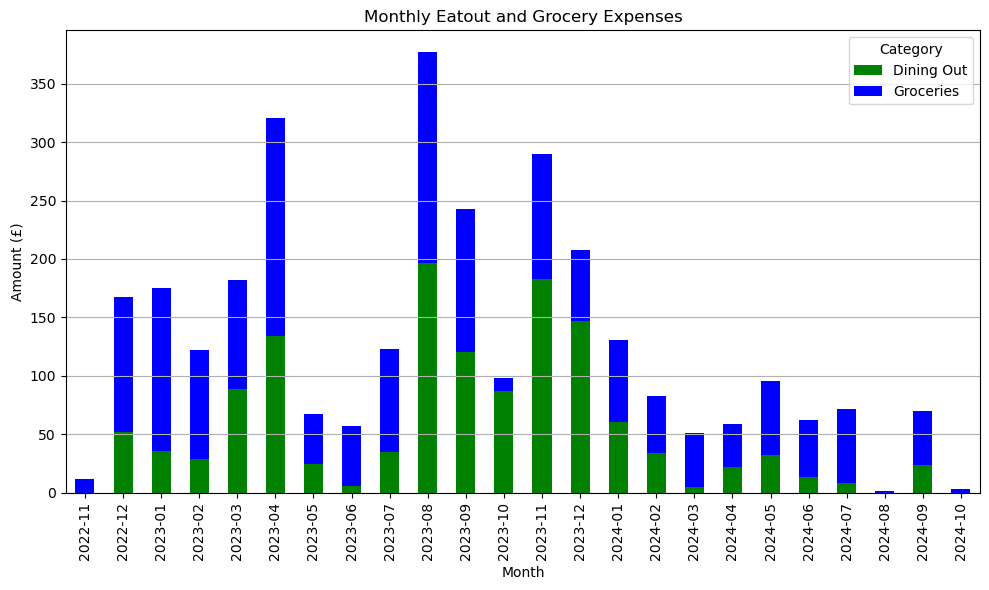

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for Dining Out and Groceries
df_filtered = df[df['Category'].isin(['Dining Out', 'Groceries'])]

# Ensure 'Transaction Date' is in datetime format
df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')

# Extract month and year for grouping
df_filtered['Month'] = df_filtered['Transaction Date'].dt.to_period('M')

# Group by Month and Category, then sum the Amount
monthly_expenses = df_filtered.groupby(['Month', 'Category'])['Debit Amount'].sum().unstack().fillna(0).reset_index()

# Convert 'Month' to string for plotting
monthly_expenses['Month'] = monthly_expenses['Month'].astype(str)

# Plotting
monthly_expenses.plot(x='Month', kind='bar', stacked=True, figsize=(10, 6), color=['green', 'blue'])
plt.title('Monthly Eatout and Grocery Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\3211699790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\3211699790.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['Transaction Date'].dt.to_period('M')


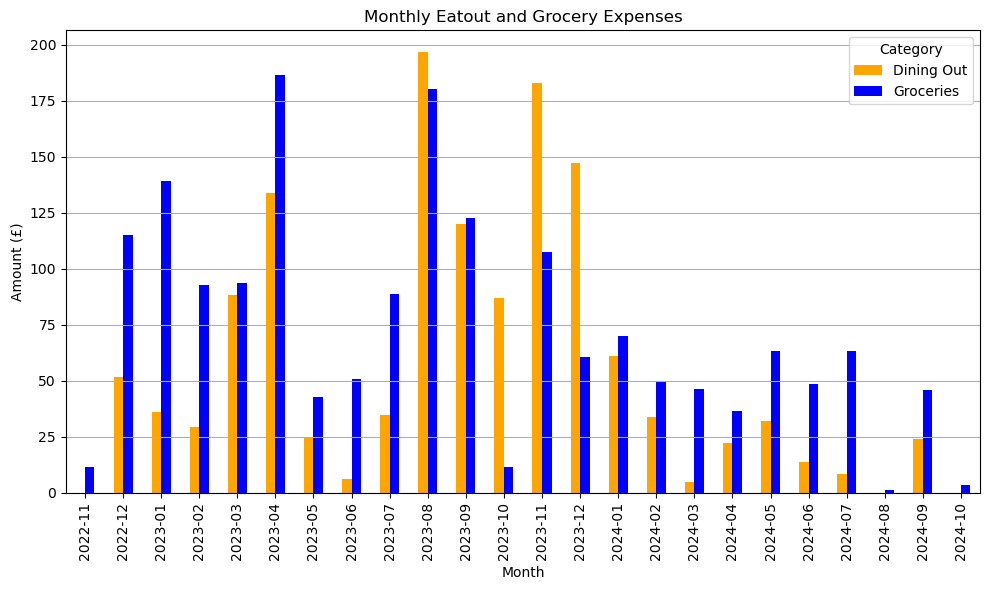

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for Dining Out and Groceries
df_filtered = df[df['Category'].isin(['Dining Out', 'Groceries'])]

# Ensure 'Transaction Date' is in datetime format
df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')

# Extract month and year for grouping
df_filtered['Month'] = df_filtered['Transaction Date'].dt.to_period('M')

# Group by Month and Category, then sum the Amount
monthly_expenses = df_filtered.groupby(['Month', 'Category'])['Debit Amount'].sum().unstack().fillna(0).reset_index()

# Convert 'Month' to string for plotting
monthly_expenses['Month'] = monthly_expenses['Month'].astype(str)

# Plotting
monthly_expenses.plot(x='Month', kind='bar', stacked=False, figsize=(10, 6), color=['orange', 'blue'])
plt.title('Monthly Eatout and Grocery Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [119]:
# Filter the DataFrame for Dining Out
Dining_Out_df = df[df['Category'] == 'Dining Out']

# Ensure 'Transaction Date' is in datetime format
Dining_Out_df['Transaction Date'] = pd.to_datetime(Dining_Out_df['Transaction Date'], errors='coerce')

# Extract month and year for grouping
Dining_Out_df['Month'] = Dining_Out_df['Transaction Date'].dt.to_period('M')

# Group by Month and calculate the total Amount for each month
monthly_Dining_Out = Dining_Out_df.groupby('Month')['Debit Amount'].sum()

# Compute the average of the monthly Dining_Out expenses
average_monthly_Dining_Out = monthly_Dining_Out.mean()

print(f'Average Monthly Dining_Out Expenses: £{average_monthly_Dining_Out:.2f}')

Average Monthly Dining_Out Expenses: £63.64


C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\2478940669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dining_Out_df['Transaction Date'] = pd.to_datetime(Dining_Out_df['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\2478940669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dining_Out_df['Month'] = Dining_Out_df['Transaction Date'].dt.to_period('M')


In [135]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Olajide\Downloads\merged_bank_statements_1.csv' 
df = pd.read_csv(file_path)

# Define a mapping dictionary to categorize transactions
category_mapping = {
    "ALDI": "ALDI",
    "ASDA": "ASDA",
    "TESCO": "TESCO",
    "LIDL": "LIDL",
    "MORRISONS": "MORRISONS",
    "WAITROSE": "Groceries",
    "Samis": "Samis",
    "sainsbury": "sainsbury",
    "CO OP": "coop",
    "co-op": "coop",
    "FARMFOODS": "Groceries",
    "HOME BARGAINS": "FARMFOODS",
    "ICELAND": "Groceries",
    "MS Cosmetics": "Groceries",
    "My Hair My Beauty": "Groceries",
    "ONE STOP": "Groceries",
    "PEP": "shopping",
    "POUNDLAND": "Groceries",
    "MARKS": "Others",
    "SAVERS": "Groceries",
    "Selly park conveni": "Groceries",
    "UNIVERSITY SUPERST": "Groceries",
    "World Food": "World",
    "BP": "Groceries",
    "IHS": "Visa",
    "UKVISA": "Visa",
    "OLAJIDE": "Payments",
    "Exchanged": "Crypto",
    "Lebara": "PhoneBill",
    "NATIONAL EXPRESS": "Transport",
    "NX BUS": "Transport",
    "TRAINLINE": "Transport",
    "RAILCARD": "Transport",
    "Beryl": "Transport",
    "T/O": "Transport",
    "WEST MIDLANDS METR": "Transport",
    "Uber": "Transport",
    "bolt": "Transport",
    "Diamond Bus": "Transport",
    "MCDONALDS": "Dining Out",
    "DOMINOS": "Dining Out",
    "COSTA": "Dining Out",
    "GREGGS": "Dining Out",
    "BIG JOHN": "Dining Out",
    "Caspian": "Dining Out",
    "Dixy": "Dining Out",
    "DR SHAWARMA": "Dining Out",
    "Empress": "Dining Out",
    "GOOSE": "Dining Out",
    "HAMS HALL DEPOT": "Dining Out",
    "Just Eat": "Dining Out",
    "KFC": "Dining Out",
    "King of Kings": "Dining Out",
    "NY": "Dining Out",
    "BrewDog": "Dining Out",
    "RIO": "Dining Out",
    "SHERE": "Dining Out",
    "CIAO BELLA": "Dining Out",
    "SUBWAY": "Dining Out",
    "TIM HORTONS": "Dining Out",
    "TooGood": "Dining Out",
    "Hobbycraft": "Shopping",
    "THEWORKS": "Shopping",
    "PRIMARK": "Shopping",
    "BOOTS": "Shopping",
    "UNITE RENT COLLECT": "Bills/Rent",
    "LSAV Rent": "Bills/Rent",
    "SPACE STATION": "Bills/Rent",
    "MORAN PROPERTIES": "Bills/Rent",
    "M NORMAN": "Bills/Rent",
    "TARIQ KHATTAK": "Bills/Rent",
    "VICTOR OKHAWERE": "Bills/Rent",
    "Netflix": "entertainment",
    "Cineworld": "entertainment",
    
    
    # Add more keywords and categories as needed
}

# Function to categorize transactions based on description
def categorize_transaction(description):
    for keyword, category in category_mapping.items():
        if keyword.lower() in description.lower():
            return category
    return "Miscellaneous"

# Apply the categorization function to each row
df['Category'] = df['Transaction Description'].apply(categorize_transaction)

# Save the categorized data back to an Excel file
output_file = 'categorized_transactions_5.xlsx'
df.to_excel(output_file, index=False)

print(f"Categorized transactions saved to {output_file}")





Categorized transactions saved to categorized_transactions_5.xlsx


C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4092854195.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4092854195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4092854195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

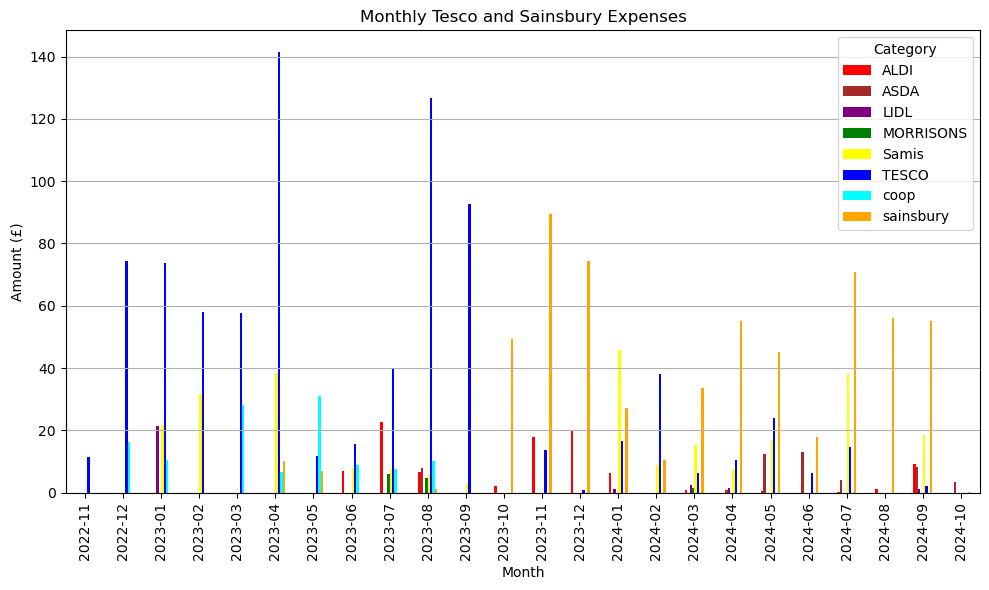

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for sainsbury and Groceries LIDL
df_filtered = df[df['Category'].isin(['coop', 'LIDL', 'MORRISONS', 'ASDA','ALDI','sainsbury', 'TESCO', 'Samis'])]

# Ensure 'Transaction Date' is in datetime format
df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')

# Extract month and year for grouping
df_filtered['Month'] = df_filtered['Transaction Date'].dt.to_period('M')

# Group by Month and Category, then sum the Amount
monthly_expenses = df_filtered.groupby(['Month', 'Category'])['Debit Amount'].sum().unstack().fillna(0).reset_index()

# Convert 'Month' to string for plotting
monthly_expenses['Month'] = monthly_expenses['Month'].astype(str)

# Plotting
monthly_expenses.plot(x='Month', kind='bar', stacked=False, figsize=(10, 6), color=['red', 'brown', 'purple', 'green', 'yellow', 'blue', 'cyan', 'orange'])
plt.title('Monthly Tesco and Sainsbury Expenses')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4242823450.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4242823450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')
C:\Users\Olajide\AppData\Local\Temp\ipykernel_17892\4242823450.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

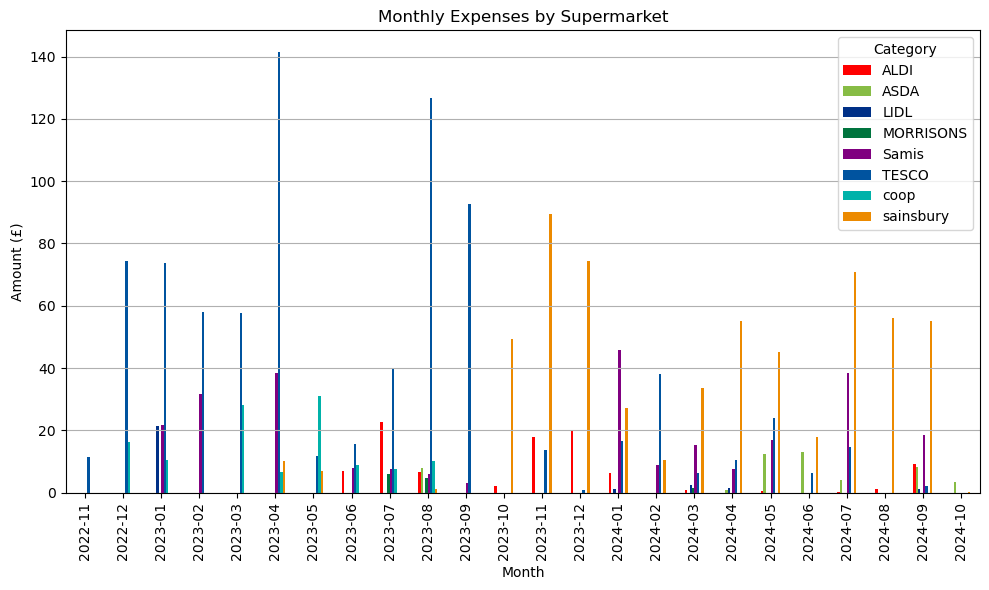

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for specified supermarkets
df_filtered = df[df['Category'].isin(['coop', 'LIDL', 'MORRISONS', 'ASDA', 'ALDI', 'sainsbury', 'TESCO', 'Samis'])]

# Ensure 'Transaction Date' is in datetime format
df_filtered['Transaction Date'] = pd.to_datetime(df_filtered['Transaction Date'], errors='coerce')

# Extract month and year for grouping
df_filtered['Month'] = df_filtered['Transaction Date'].dt.to_period('M')

# Group by Month and Category, then sum the Amount
monthly_expenses = df_filtered.groupby(['Month', 'Category'])['Debit Amount'].sum().unstack().fillna(0).reset_index()

# Convert 'Month' to string for plotting
monthly_expenses['Month'] = monthly_expenses['Month'].astype(str)

# Assign brand colors
colors = {
    'coop': '#00b2a9',        # Cyan
    'LIDL': '#003087',        # Blue for Lidl
    'MORRISONS': '#00743e',   # Green
    'ASDA': '#87bc45',        # Light Green
    'ALDI': 'red',        # Dark Blue #0a2440
    'sainsbury': '#ec8a00',   # Orange
    'TESCO': '#00539f',       # Blue
    'Samis': '#800080',       # Purple (generic)
}

# Set the plot colors based on the categories
color_list = [colors.get(cat, 'gray') for cat in monthly_expenses.columns if cat != 'Month']

# Plotting
monthly_expenses.plot(x='Month', kind='bar', stacked=False, figsize=(10, 6), color=color_list)
plt.title('Monthly Expenses by Supermarket')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [141]:
monthly_expenses

Category    Month   ALDI   ASDA   LIDL  MORRISONS    Samis     TESCO   coop  \
0         2022-11   0.00   0.00   0.00       0.00   0.0000   11.4500   0.00   
1         2022-12   0.00   0.00   0.00       0.00   0.0000   74.4100  16.10   
2         2023-01   0.00   0.00  21.28       0.00  21.6000   73.7500  10.40   
3         2023-02   0.00   0.00   0.00       0.00  31.5600   58.0500   0.00   
4         2023-03   0.00   0.00   0.00       0.00   0.0000   57.5500  28.05   
5         2023-04   0.00   0.00   0.00       0.00  38.5300  141.3900   6.55   
6         2023-05   0.00   0.00   0.00       0.00   0.0000   11.7000  30.94   
7         2023-06   6.84   0.00   0.00       0.00   7.9900   15.4500   8.94   
8         2023-07  22.73   0.00   0.00       6.02   7.4800   39.9000   7.69   
9         2023-08   6.75   8.00   0.00       4.79   5.9900  126.7500  10.08   
10        2023-09   0.00   0.00   0.00       0.00   3.0000   92.7300   0.00   
11        2023-10   2.09   0.00   0.00       0.00   0.0000    0.0000   0.00   
12        2023-11  17.91   0.00   0.00       0.00   0.0000   13.6000   0.00   
13        2023-12  19.86   0.00   0.00       0.00   0.0000    0.9800   0.00   
14        2024-01   6.30   0.00   1.18       0.00  45.7200   16.6000   0.00   
15        2024-02   0.00   0.00   0.00       0.00   8.8900   38.0200   0.00   
16        2024-03   0.70   0.00   2.58       1.47  15.2800    6.3500   0.00   
17        2024-04   0.00   0.70   1.43       0.00   7.5900   10.3100   0.00   
18        2024-05   0.39  12.34   0.00       0.00  16.7700   24.0400   0.00   
19        2024-06   0.00  13.06   0.00       0.00   0.0000    6.3400   0.00   
20        2024-07   0.35   3.98   0.00       0.00  38.2705   14.7285   0.00   
21        2024-08   1.04   0.00   0.00       0.00   0.0000    0.0000   0.00   
22        2024-09   9.25   8.31   1.12       0.00  18.4700    2.0000   0.00   
23        2024-10   0.00   3.28   0.00       0.00   0.0000    0.0000   0.00   

Category  sainsbury  
0            0.0000  
1            0.0000  
2            0.0000  
3            0.0000  
4            0.0000  
5           10.0000  
6            6.8000  
7            0.0000  
8            0.0000  
9            1.1500  
10           0.0000  
11          49.3000  
12          89.6000  
13          74.4900  
14          27.3100  
15          10.5600  
16          33.5195  
17          55.1100  
18          45.1970  
19          17.9300  
20          70.9165  
21          56.1600  
22          55.1000  
23           0.2800

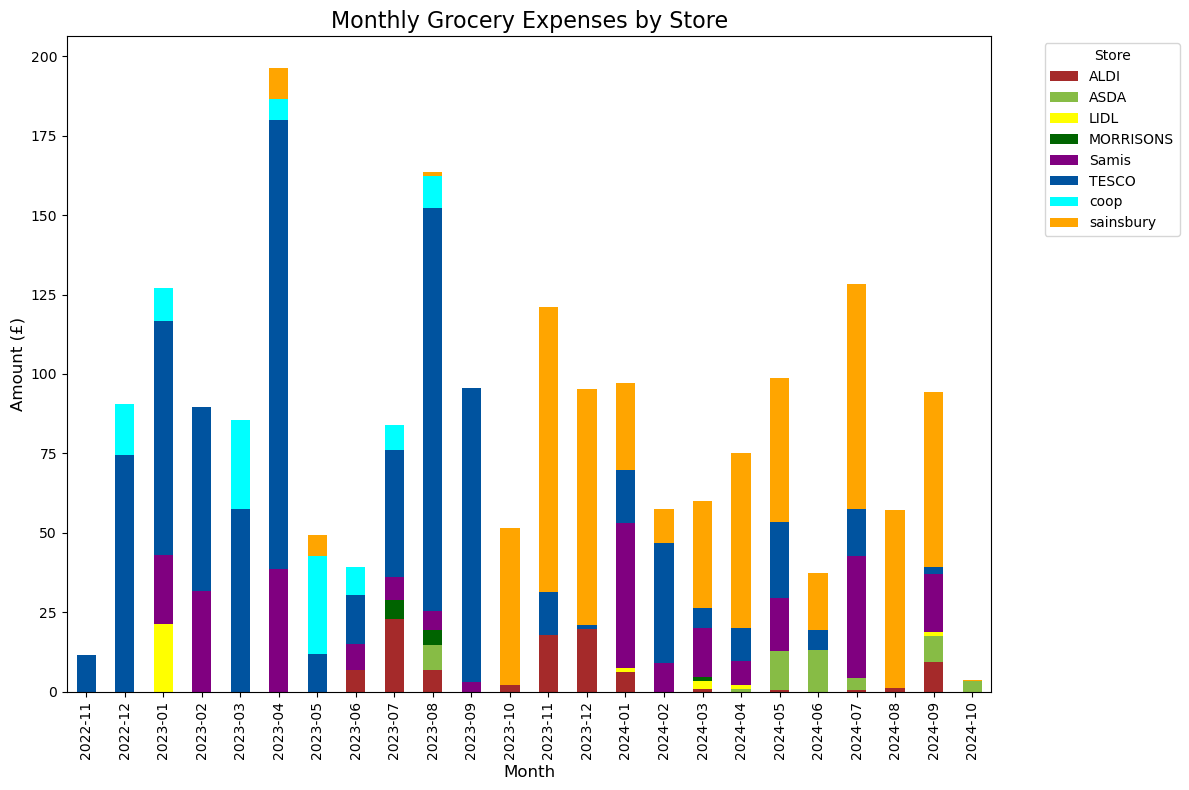

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = {
    'Month': ['2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
              '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10'],
    'ALDI': [0, 0, 0, 0, 0, 0, 0, 6.84, 22.73, 6.75, 0, 2.09, 17.91, 19.86, 6.3, 0, 0.7, 0, 0.39, 0, 0.35, 1.04, 9.25, 0],
    'ASDA': [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0.7, 12.34, 13.06, 3.98, 0, 8.31, 3.28],
    'LIDL': [0, 0, 21.28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.18, 0, 2.58, 1.43, 0, 0, 0, 0, 1.12, 0],
    'MORRISONS': [0, 0, 0, 0, 0, 0, 0, 0, 6.02, 4.79, 0, 0, 0, 0, 0, 0, 1.47, 0, 0, 0, 0, 0, 0, 0],
    'Samis': [0, 0, 21.6, 31.56, 0, 38.53, 0, 7.99, 7.48, 5.99, 3, 0, 0, 0, 45.72, 8.89, 15.28, 7.59, 16.77, 0, 38.27, 0, 18.47, 0],
    'TESCO': [11.45, 74.41, 73.75, 58.05, 57.55, 141.39, 11.7, 15.45, 39.9, 126.75, 92.73, 0, 13.6, 0.98, 16.6, 38.02, 6.35, 10.31, 24.04, 6.34, 14.73, 0, 2, 0],
    'coop': [0, 16.1, 10.4, 0, 28.05, 6.55, 30.94, 8.94, 7.69, 10.08, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'sainsbury': [0, 0, 0, 0, 0, 10, 6.8, 0, 0, 1.15, 0, 49.3, 89.6, 74.49, 27.31, 10.56, 33.52, 55.11, 45.2, 17.93, 70.92, 56.16, 55.1, 0.28]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set brand colors
colors = {
    'ALDI': 'brown', 
    'ASDA': '#87bc45', 
    'LIDL': 'yellow', 
    'MORRISONS': 'darkgreen', 
    'Samis': 'purple', 
    'TESCO': '#00539f', 
    'coop': 'cyan', 
    'sainsbury': 'orange'
}

# Plot the data
ax = df.plot(x='Month', kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in df.columns[1:]])
plt.title('Monthly Grocery Expenses by Store', fontsize=16)
plt.ylabel('Amount (£)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


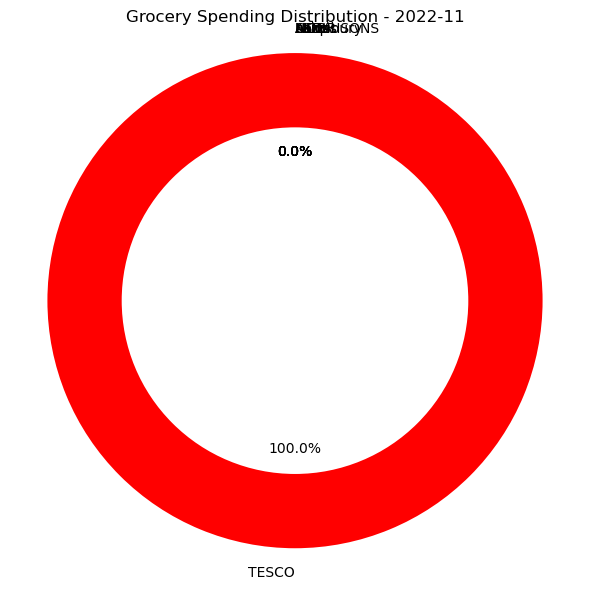

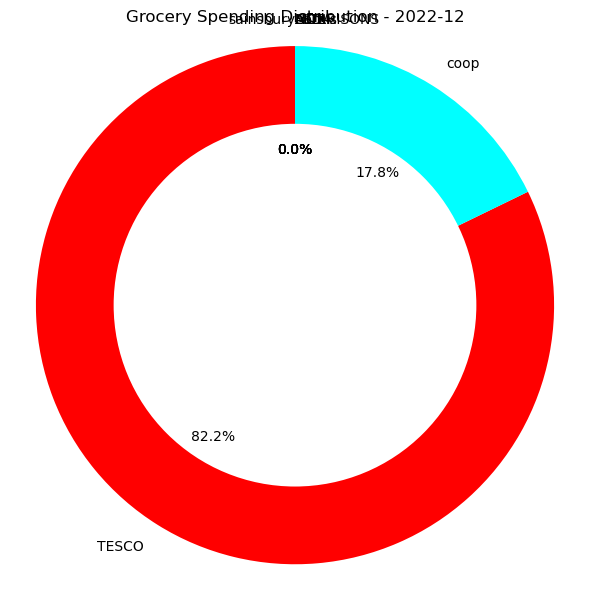

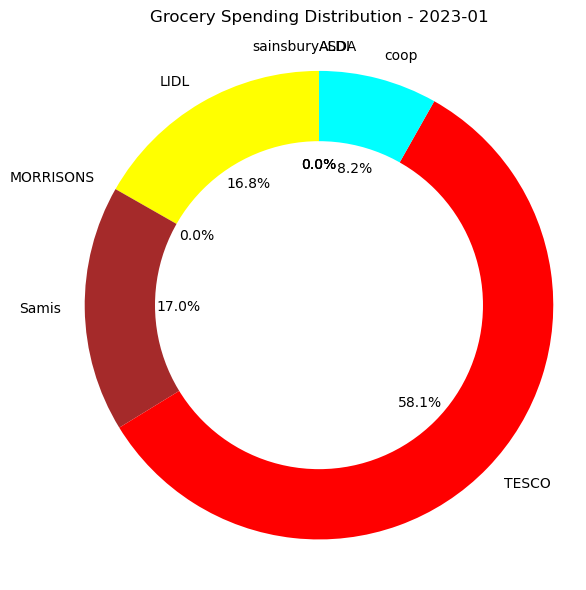

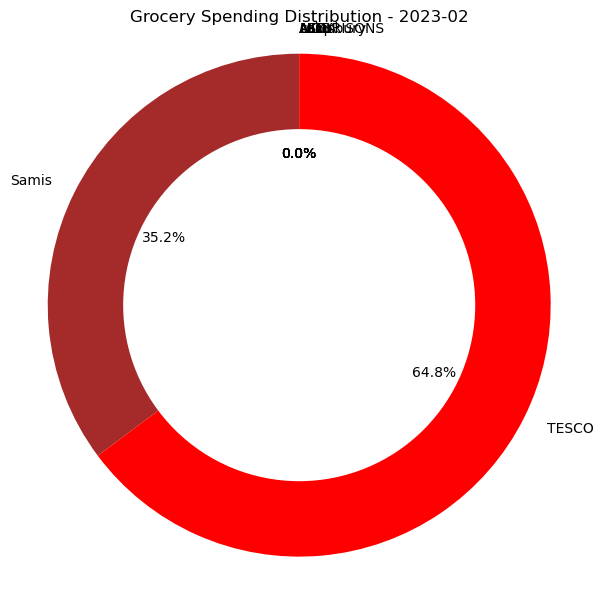

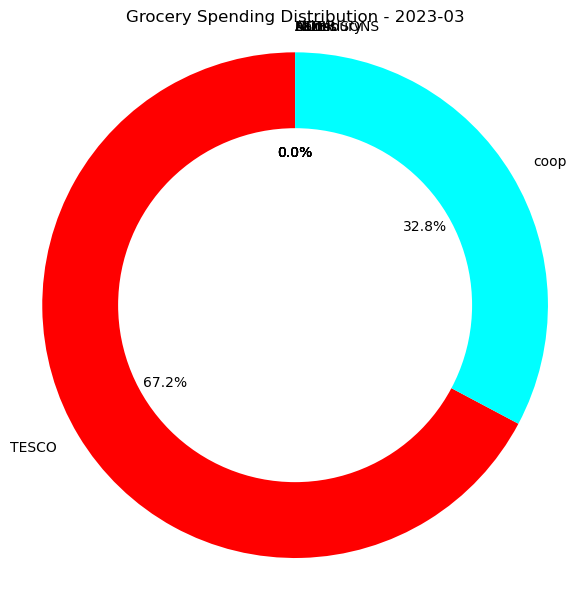

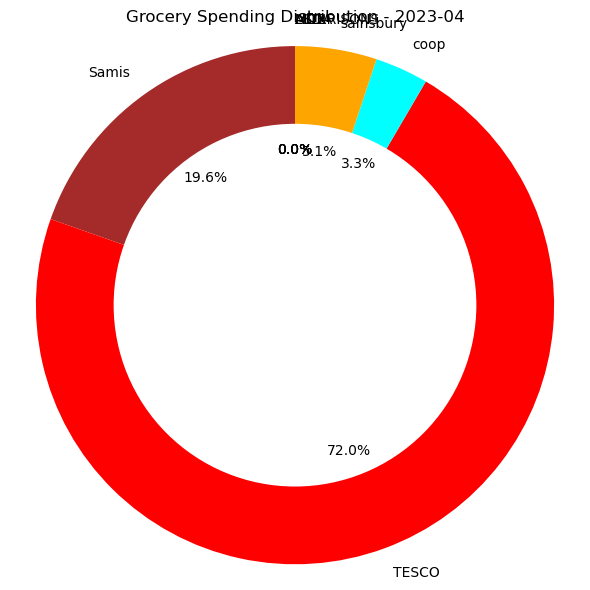

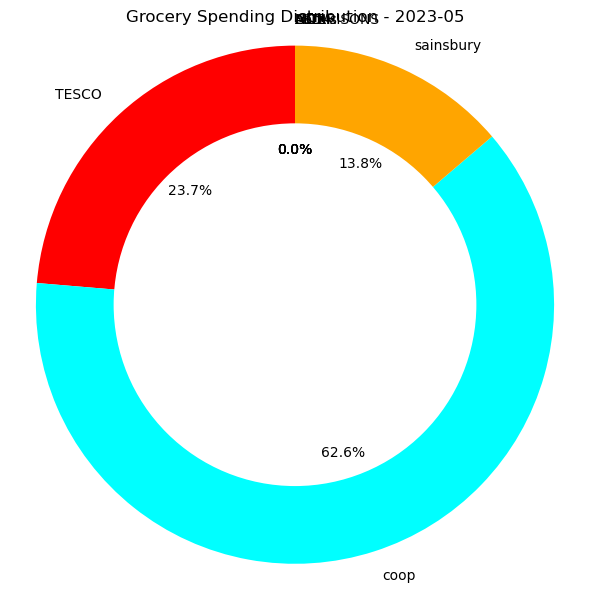

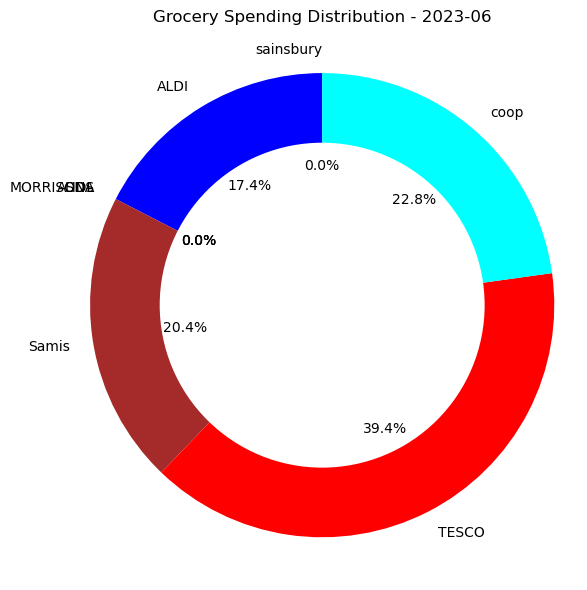

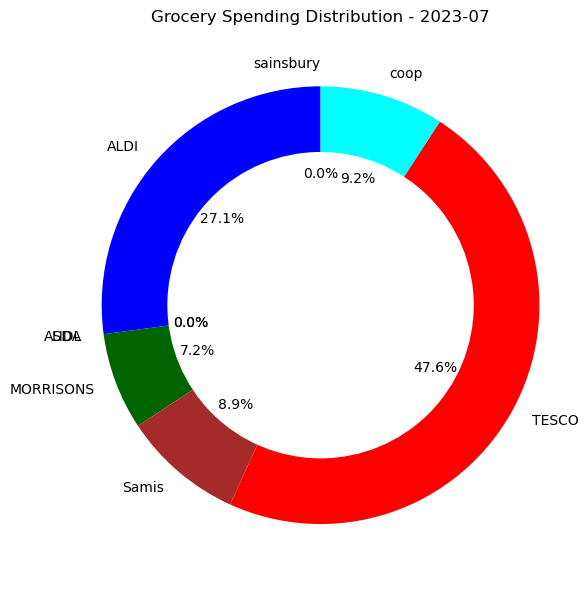

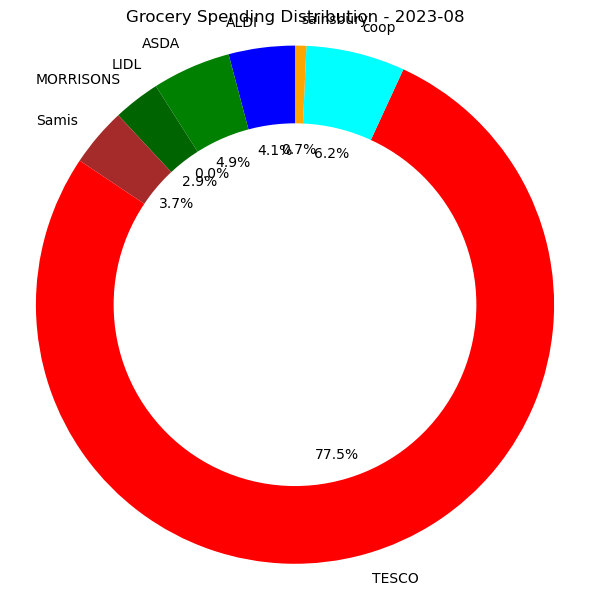

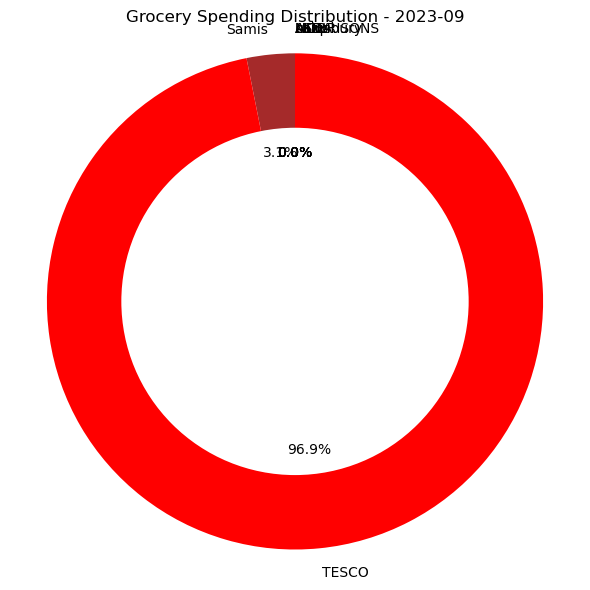

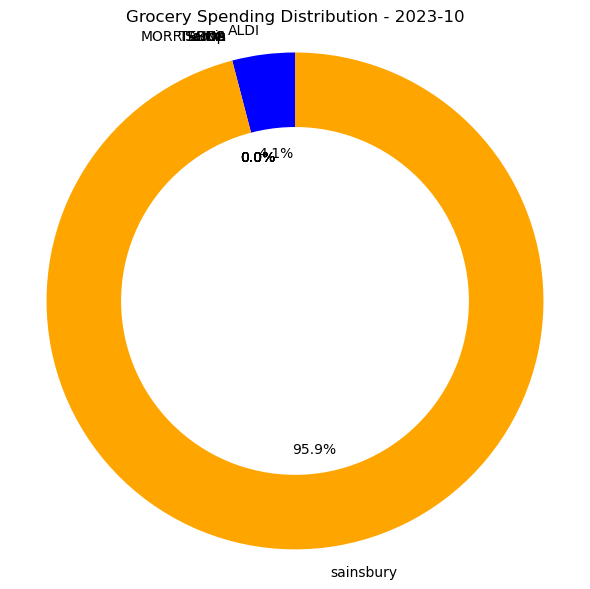

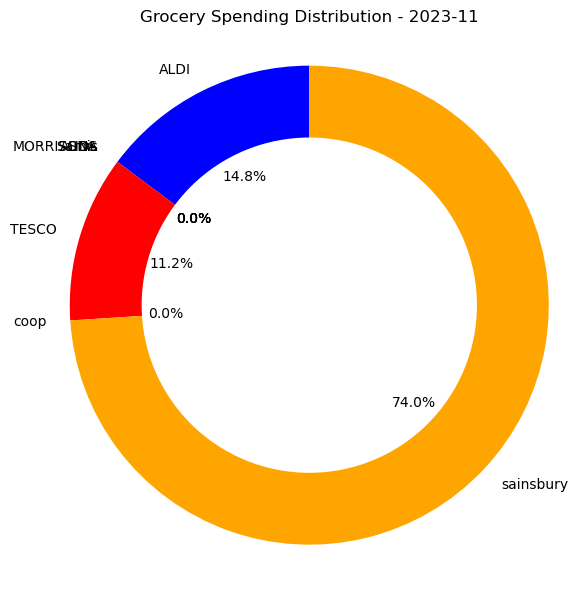

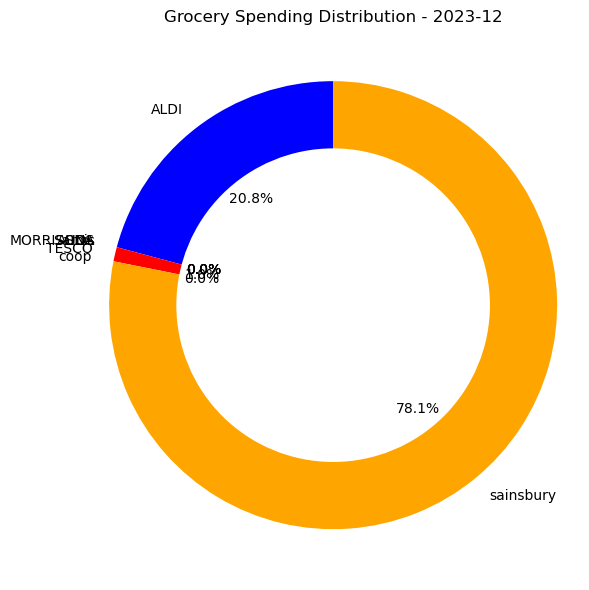

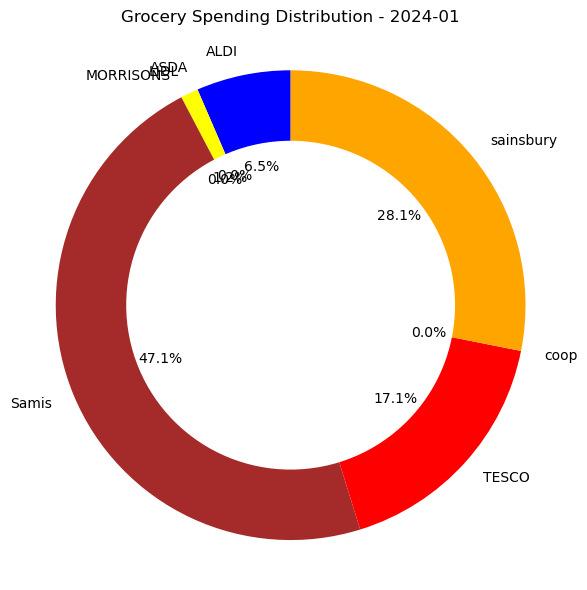

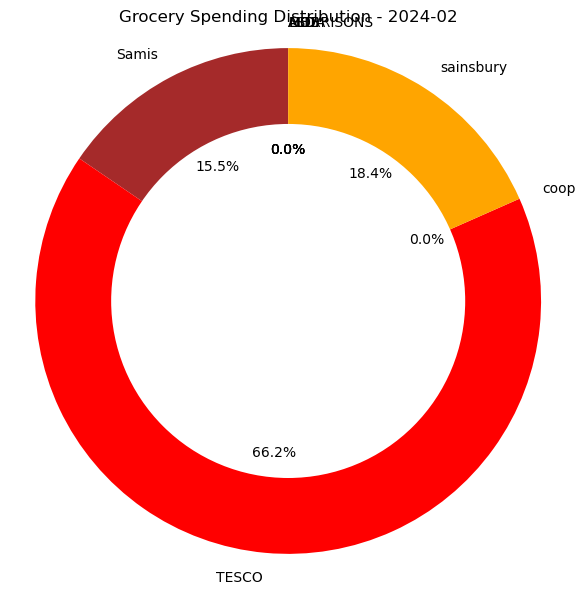

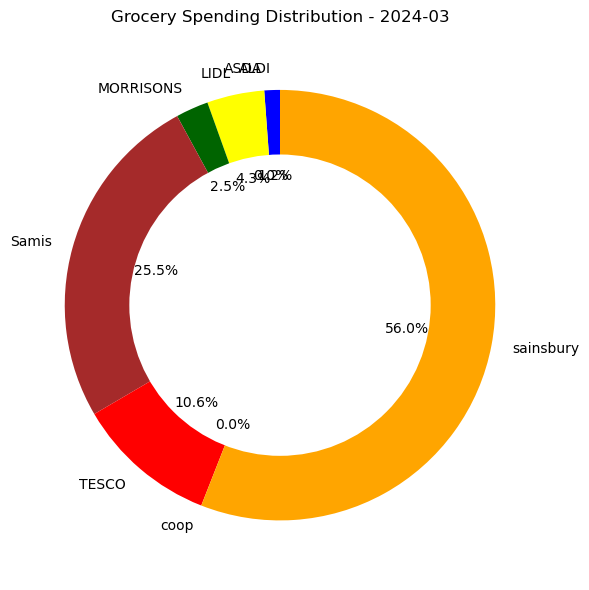

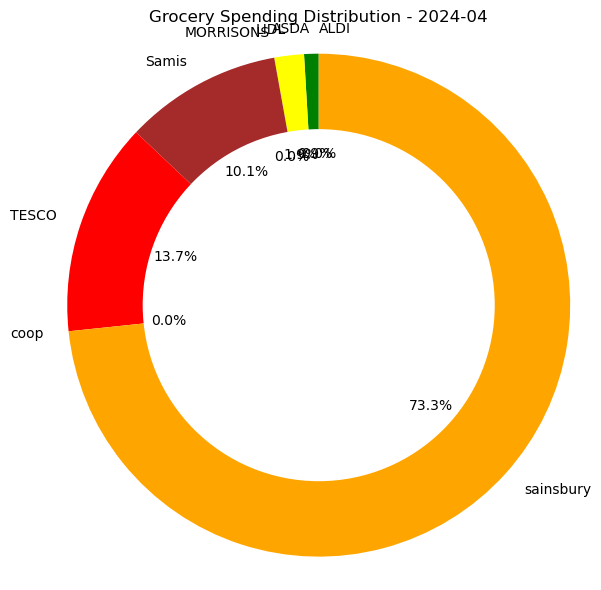

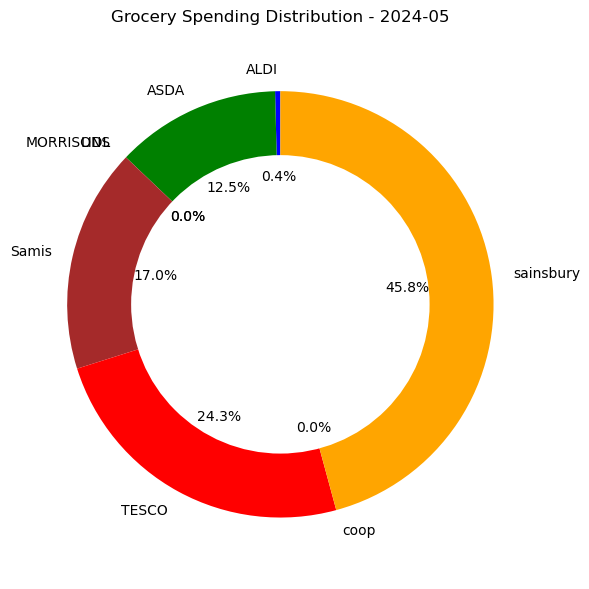

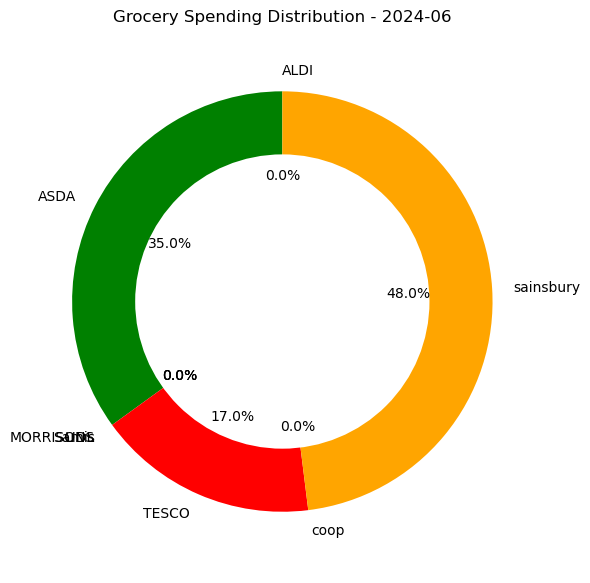

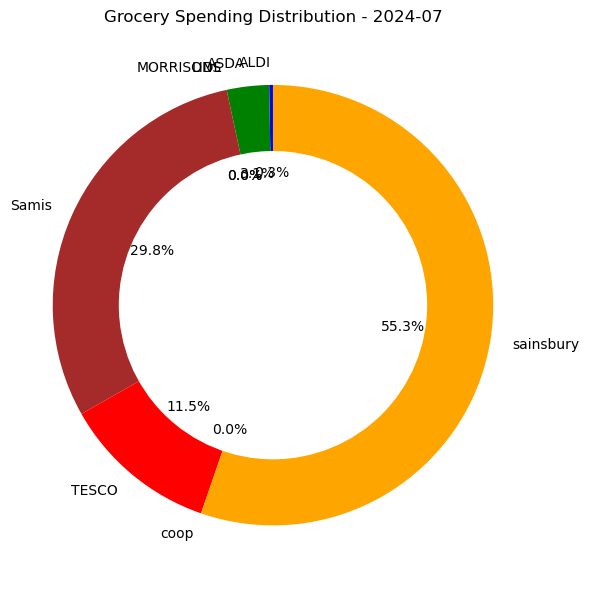

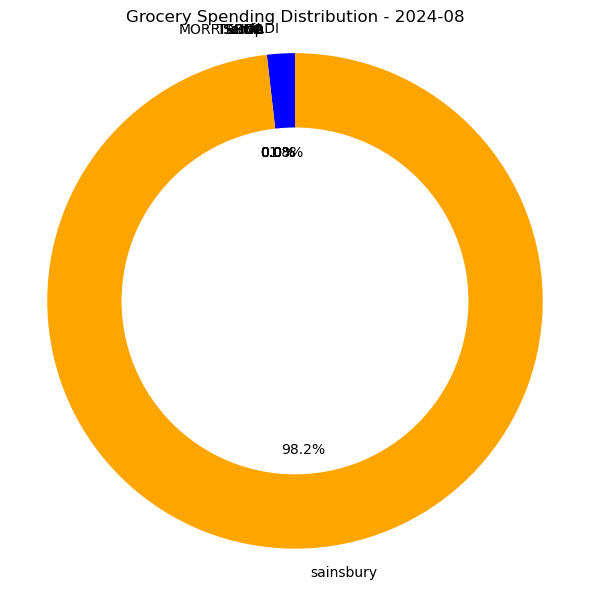

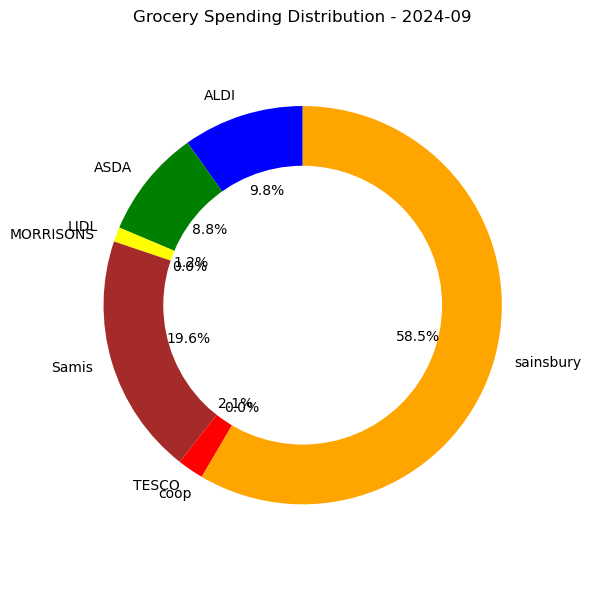

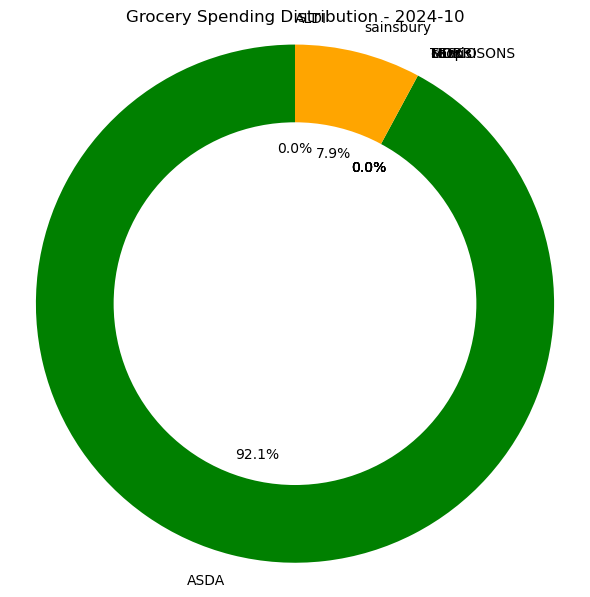

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = {
    'Month': ['2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
              '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10'],
    'ALDI': [0, 0, 0, 0, 0, 0, 0, 6.84, 22.73, 6.75, 0, 2.09, 17.91, 19.86, 6.3, 0, 0.7, 0, 0.39, 0, 0.35, 1.04, 9.25, 0],
    'ASDA': [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0.7, 12.34, 13.06, 3.98, 0, 8.31, 3.28],
    'LIDL': [0, 0, 21.28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.18, 0, 2.58, 1.43, 0, 0, 0, 0, 1.12, 0],
    'MORRISONS': [0, 0, 0, 0, 0, 0, 0, 0, 6.02, 4.79, 0, 0, 0, 0, 0, 0, 1.47, 0, 0, 0, 0, 0, 0, 0],
    'Samis': [0, 0, 21.6, 31.56, 0, 38.53, 0, 7.99, 7.48, 5.99, 3, 0, 0, 0, 45.72, 8.89, 15.28, 7.59, 16.77, 0, 38.27, 0, 18.47, 0],
    'TESCO': [11.45, 74.41, 73.75, 58.05, 57.55, 141.39, 11.7, 15.45, 39.9, 126.75, 92.73, 0, 13.6, 0.98, 16.6, 38.02, 6.35, 10.31, 24.04, 6.34, 14.73, 0, 2, 0],
    'coop': [0, 16.1, 10.4, 0, 28.05, 6.55, 30.94, 8.94, 7.69, 10.08, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'sainsbury': [0, 0, 0, 0, 0, 10, 6.8, 0, 0, 1.15, 0, 49.3, 89.6, 74.49, 27.31, 10.56, 33.52, 55.11, 45.2, 17.93, 70.92, 56.16, 55.1, 0.28]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set brand colors
colors = {
    'ALDI': 'blue', 
    'ASDA': 'green', 
    'LIDL': 'yellow', 
    'MORRISONS': 'darkgreen', 
    'Samis': 'brown', 
    'TESCO': 'red', 
    'coop': 'cyan', 
    'sainsbury': 'orange'
}

# Loop through each month and create a donut chart
for idx, row in df.iterrows():
    # Extract month and corresponding values for each brand
    month = row['Month']
    values = row[1:].values
    labels = df.columns[1:]
    
    # Only plot if there is spending in that month
    if sum(values) > 0:
        # Create pie chart
        fig, ax = plt.subplots(figsize=(6, 6))
        wedges, texts, autotexts = ax.pie(
            values, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=[colors[label] for label in labels]
        )
        
        # Draw a white circle at the center to create a donut chart
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig.gca().add_artist(centre_circle)
        
        # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.axis('equal')
        plt.title(f'Grocery Spending Distribution - {month}')
        
        # Display the chart
        plt.tight_layout()
        plt.show()


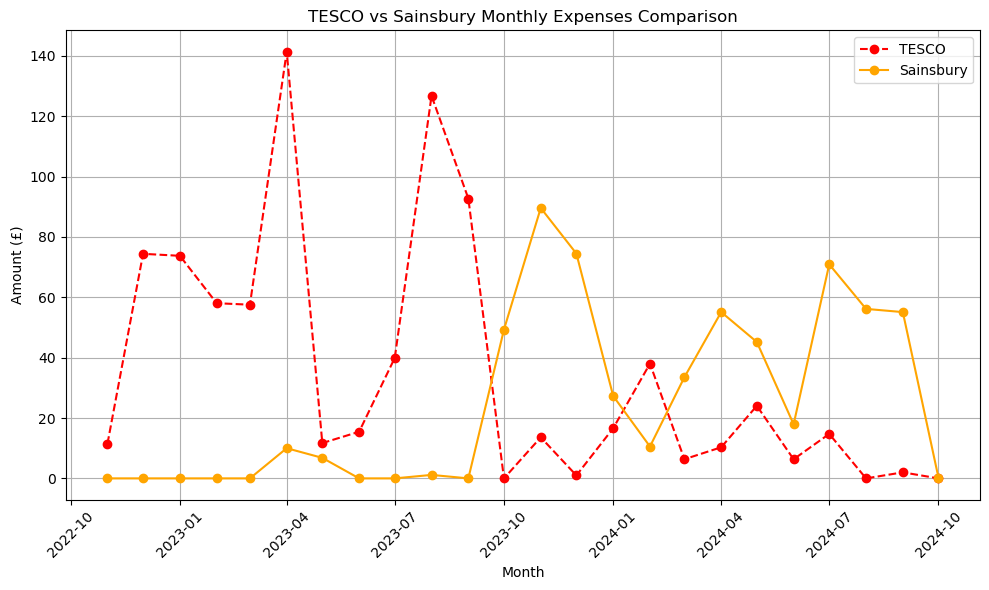

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data (already provided)
data = {
    'Month': ['2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
              '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10'],
    'TESCO': [11.45, 74.41, 73.75, 58.05, 57.55, 141.39, 11.7, 15.45, 39.9, 126.75, 92.73, 0, 13.6, 0.98, 16.6, 38.02, 6.35, 10.31, 24.04, 6.34, 14.73, 0, 2, 0],
    'sainsbury': [0, 0, 0, 0, 0, 10, 6.8, 0, 0, 1.15, 0, 49.3, 89.6, 74.49, 27.31, 10.56, 33.52, 55.11, 45.2, 17.93, 70.92, 56.16, 55.1, 0.28]
}

# Create DataFrame
df_comparison = pd.DataFrame(data)

# Convert 'Month' to datetime for better plotting
df_comparison['Month'] = pd.to_datetime(df_comparison['Month'], format='%Y-%m')

# Plot line chart to compare TESCO and Sainsbury over time
plt.figure(figsize=(10, 6))
plt.plot(df_comparison['Month'], df_comparison['TESCO'], label='TESCO', marker='o', color='red', linestyle='--')
plt.plot(df_comparison['Month'], df_comparison['sainsbury'], label='Sainsbury', marker='o', color='orange', linestyle='-')

# Add titles and labels
plt.title('TESCO vs Sainsbury Monthly Expenses Comparison')
plt.ylabel('Amount (£)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Add gridlines, legend, and tight layout
plt.grid(True)
plt.legend()

plt.tight_layout()

# Show plot
plt.show()


In [149]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Data
data = {
    'Month': ['2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
              '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10'],
    'TESCO': [11.45, 74.41, 73.75, 58.05, 57.55, 141.39, 11.7, 15.45, 39.9, 126.75, 92.73, 0, 13.6, 0.98, 16.6, 38.02, 6.35, 10.31, 24.04, 6.34, 14.73, 0, 2, 0],
    'sainsbury': [0, 0, 0, 0, 0, 10, 6.8, 0, 0, 1.15, 0, 49.3, 89.6, 74.49, 27.31, 10.56, 33.52, 55.11, 45.2, 17.93, 70.92, 56.16, 55.1, 0.28]
}

# Create DataFrame
df_comparison = pd.DataFrame(data)

# Convert 'Month' to datetime for indexing
df_comparison['Month'] = pd.to_datetime(df_comparison['Month'], format='%Y-%m')
df_comparison.set_index('Month', inplace=True)

# Create a VAR model (multivariate ARIMA)
model = VAR(df_comparison)

# Select the optimal number of lags using AIC or BIC
lag_order = model.select_order(maxlags=12)
print(lag_order.summary())  # To show selected lags based on AIC, BIC, etc.

# Fit the model using the selected lag order (let's assume AIC suggests lag order of 2)
var_model_fitted = model.fit(lag_order.aic)

# Forecasting the next 5 steps
forecast_values = var_model_fitted.forecast(df_comparison.values[-lag_order.aic:], steps=5)

# Create DataFrame for the forecasted values
forecast_index = pd.date_range(start=df_comparison.index[-1], periods=5, freq='M')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['TESCO', 'sainsbury'])

# Plotting forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_comparison.index, df_comparison['TESCO'], label='TESCO Actual')
plt.plot(df_comparison.index, df_comparison['sainsbury'], label='Sainsbury Actual')

plt.plot(forecast_df.index, forecast_df['TESCO'], label='TESCO Forecast', linestyle='--', color='red')
plt.plot(forecast_df.index, forecast_df['sainsbury'], label='Sainsbury Forecast', linestyle='--', color='orange')

plt.title('TESCO vs Sainsbury Forecast using VARIMA')
plt.xlabel('Month')
plt.ylabel('Amount (£)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


c:\ProgramData\anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.

c:\ProgramData\anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       14.12      14.22*   1.352e+06       14.13
1      14.05*       14.35  1.274e+06*      14.10*
2       14.07       14.57   1.324e+06       14.16
3       14.27       14.97   1.693e+06       14.39
4       14.20       15.09   1.730e+06       14.35
5       14.09       15.19   1.832e+06       14.28
-------------------------------------------------


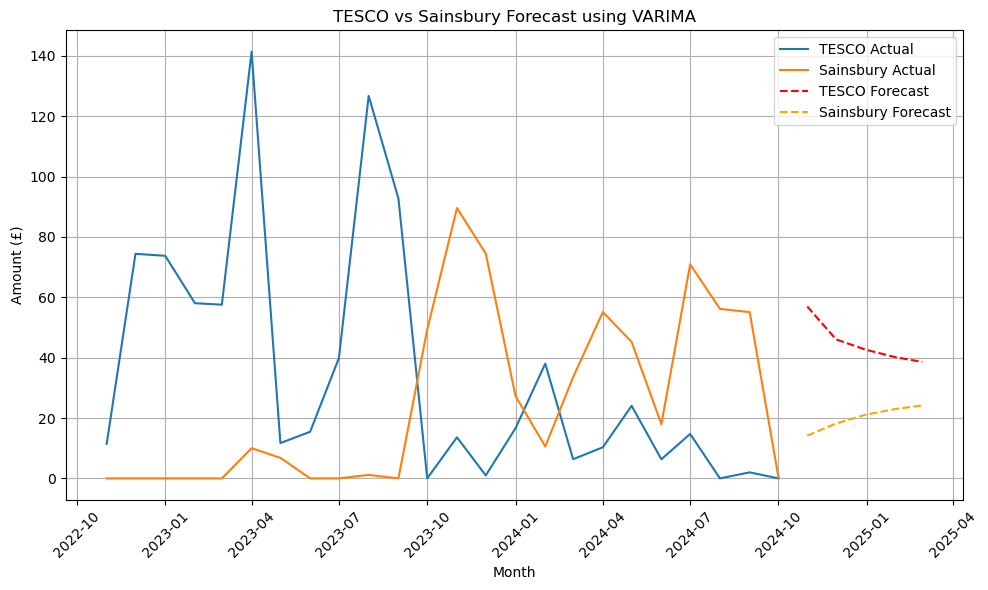

In [150]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Data
data = {
    'Month': ['2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
              '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10'],
    'TESCO': [11.45, 74.41, 73.75, 58.05, 57.55, 141.39, 11.7, 15.45, 39.9, 126.75, 92.73, 0, 13.6, 0.98, 16.6, 38.02, 6.35, 10.31, 24.04, 6.34, 14.73, 0, 2, 0],
    'sainsbury': [0, 0, 0, 0, 0, 10, 6.8, 0, 0, 1.15, 0, 49.3, 89.6, 74.49, 27.31, 10.56, 33.52, 55.11, 45.2, 17.93, 70.92, 56.16, 55.1, 0.28]
}

# Create DataFrame
df_comparison = pd.DataFrame(data)

# Convert 'Month' to datetime for indexing
df_comparison['Month'] = pd.to_datetime(df_comparison['Month'], format='%Y-%m')
df_comparison.set_index('Month', inplace=True)

# Create a VAR model (multivariate ARIMA)
model = VAR(df_comparison)

# Select the optimal number of lags using AIC or BIC
# Reduce the maxlags to 5 or less
lag_order = model.select_order(maxlags=5)
print(lag_order.summary())  # To show selected lags based on AIC, BIC, etc.

# Fit the model using the selected lag order (let's assume AIC suggests lag order of 2)
var_model_fitted = model.fit(lag_order.aic)

# Forecasting the next 5 steps
forecast_values = var_model_fitted.forecast(df_comparison.values[-lag_order.aic:], steps=5)

# Create DataFrame for the forecasted values
forecast_index = pd.date_range(start=df_comparison.index[-1], periods=5, freq='M')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['TESCO', 'sainsbury'])

# Plotting forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_comparison.index, df_comparison['TESCO'], label='TESCO Actual')
plt.plot(df_comparison.index, df_comparison['sainsbury'], label='Sainsbury Actual')

plt.plot(forecast_df.index, forecast_df['TESCO'], label='TESCO Forecast', linestyle='--', color='red')
plt.plot(forecast_df.index, forecast_df['sainsbury'], label='Sainsbury Forecast', linestyle='--', color='orange')

plt.title('TESCO vs Sainsbury Forecast using VARIMA')
plt.xlabel('Month')
plt.ylabel('Amount (£)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


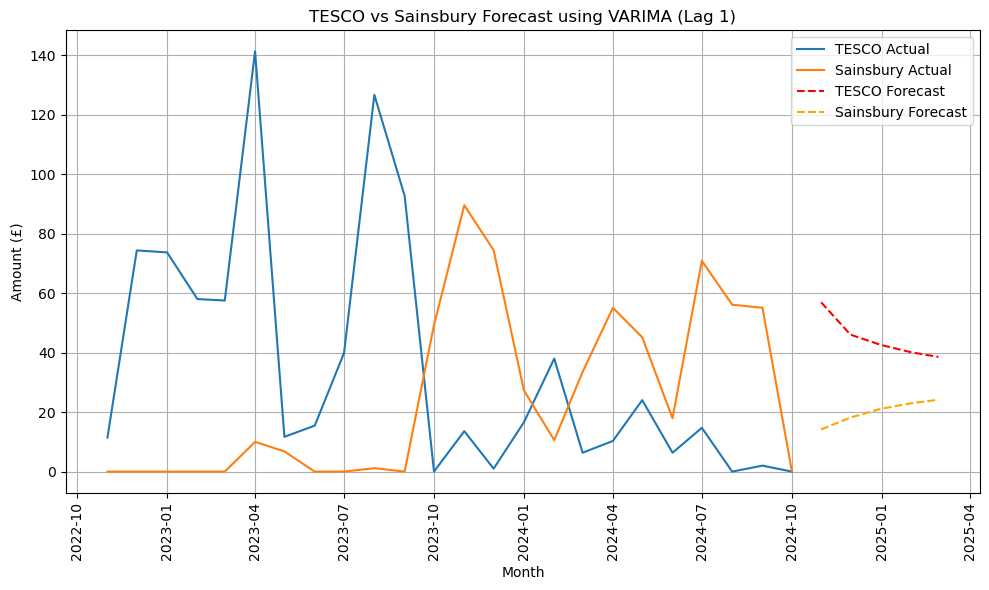

In [152]:
# Fit the model using the selected lag order (lag 1 based on AIC, FPE, and HQIC)
var_model_fitted = model.fit(1)

# Forecasting the next 5 steps
forecast_values = var_model_fitted.forecast(df_comparison.values[-1:], steps=5)

# Create DataFrame for the forecasted values
forecast_index = pd.date_range(start=df_comparison.index[-1], periods=5, freq='M')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['TESCO', 'sainsbury'])

# Plotting forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_comparison.index, df_comparison['TESCO'], label='TESCO Actual')
plt.plot(df_comparison.index, df_comparison['sainsbury'], label='Sainsbury Actual')

plt.plot(forecast_df.index, forecast_df['TESCO'], label='TESCO Forecast', linestyle='--', color='red')
plt.plot(forecast_df.index, forecast_df['sainsbury'], label='Sainsbury Forecast', linestyle='--', color='orange')

plt.title('TESCO vs Sainsbury Forecast using VARIMA (Lag 1)')
plt.xlabel('Month')
plt.ylabel('Amount (£)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [153]:
forecast_df['sainsbury']

2024-10-31    14.173503
2024-11-30    18.180128
2024-12-31    21.122551
2025-01-31    22.985664
2025-02-28    24.184854
Freq: M, Name: sainsbury, dtype: float64

In [ ]:
forecast_df['sainsbury']

2024-10-31    14.173503
2024-11-30    18.180128
2024-12-31    21.122551
2025-01-31    22.985664
2025-02-28    24.184854
Freq: M, Name: sainsbury, dtype: float64

In [154]:
# Extracting forecast for TESCO and displaying it similar to sainsbury's forecast
tesco_forecast = forecast_df['TESCO']
tesco_forecast


2024-10-31    56.951352
2024-11-30    46.069855
2024-12-31    42.628520
2025-01-31    40.151783
2025-02-28    38.580229
Freq: M, Name: TESCO, dtype: float64

In [155]:
# Extracting forecast for TESCO and displaying it similar to sainsbury's forecast
tesco_forecast = forecast_df['TESCO']
tesco_forecast

2024-10-31    56.951352
2024-11-30    46.069855
2024-12-31    42.628520
2025-01-31    40.151783
2025-02-28    38.580229
Freq: M, Name: TESCO, dtype: float64

2024-10-31    56.951352
2024-11-30    46.069855
2024-12-31    42.628520
2025-01-31    40.151783
2025-02-28    38.580229
Freq: M, Name: TESCO, dtype: float64